
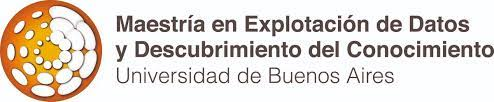

##      **_Data mining en Ciencia y Tecnología_**
#                2do cuatrimestre 2023
#                     Grupo 5



# TP 1: Data mining en imágenes

In [1]:
%%capture
pip install Clustimage

In [2]:
from clustimage import Clustimage
import cv2
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors
import pandas as pd
import random
import os
import numpy as np

In [3]:
# Clustering (sklearn)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score, silhouette_samples
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
from sklearn.metrics.cluster import adjusted_rand_score

In [4]:
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 12
RoyalD = ["#9A8822","#F5CDB4","#F8AFA8","#FDDDA0","#74A089"]
cmRoyal = matplotlib.colors.ListedColormap(RoyalD, name='cmRoyal', N=None)
plt.register_cmap(cmap=cmRoyal)

#1.   Levantamos las imágenes



In [5]:
#os.listdir(image_path)

In [4]:
from google.colab import drive
drive.mount('/content/drive')
!gdown --id
#Path para que ejecute Vero
#image_path = "/content/drive/MyDrive/Datamining aplicado a Ciencia y Tecnología/Tp 1 - dmcyt/images/test" ##cambiar en caso de ser necesario
#Path para que ejecute Maggie
#image_path = "/content/drive/MyDrive/Data Mining/DMCYT2023/datasets/vegetales" ##cambiar en caso de ser necesario
#Path para que ejecute Mauro
image_path = "/content/drive/MyDrive/DMCyT-2023/Tp 1 - dmcyt/images/test" ##cambiar en caso de ser necesario


path = sorted([os.path.join(image_path, file)
for file in os.listdir(image_path)
if file.endswith('.jpg')])

print(len(path))
print(path[0])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
usage: gdown [-h] [-V] [-O OUTPUT] [-q] [--fuzzy] [--id] [--proxy PROXY] [--speed SPEED]
             [--no-cookies] [--no-check-certificate] [--continue] [--folder] [--remaining-ok]
             url_or_id
gdown: error: the following arguments are required: url_or_id
3000
/content/drive/MyDrive/DMCyT-2023/Tp 1 - dmcyt/images/test/0001.jpg


In [6]:
def cv2_read_RGB(imagen):
  return cv2.imread(imagen)[:,:,::-1]

In [ ]:
# cl = Clustimage()
# img = cl.imread(path[0], dim=(128,128),colorscale=0) #Levanta la imagen
# print(img.shape)
# imagen = img.reshape(128,128)
# plt.imshow(imagen,cmap='gray')
# plt.axis('off')

(224, 224, 3)


(-0.5, 223.5, 223.5, -0.5)

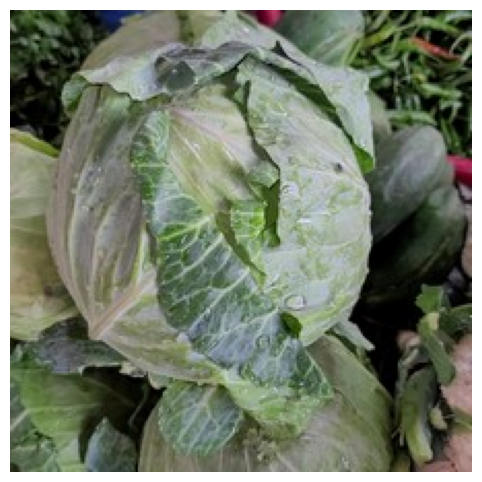

In [ ]:
#abrimos una imagen para ver si levantó bien los colores y ver el tamaño
img = cv2_read_RGB(image_path+'/1097.jpg')
print(img.shape)

plt.imshow(img)
plt.axis('off')

In [ ]:
#nos fijamos si todas las imágenes tienen el mismo tamaño que la observada
from skimage import io
import os
x = 224 #cambiamos las dimensiones por el valor observado (este cambio debería servir para todo el colab)
y = 224 #cambiamos las dimensiones por el valor observado

def check_image_size(image_path):
    for file in image_path:
        img = io.imread(file)
        if img.shape[0] != x or img.shape[1] != y:
            print(f"La imagen {file} NO tiene el tamaño correcto.")

check_image_size(path)

La imagen /content/drive/MyDrive/DMCyT-2023/Tp 1 - dmcyt/images/test/2049.jpg NO tiene el tamaño correcto.


In [ ]:
#en caso de tener que cambiar el tamaño de alguna imagen
# from skimage import io, transform
# new_img = img[:,:,:3]
# new_img = transform.resize(new_img, (x, y))

# #io.imsave('0208_reshape.png', (new_img * 255).astype(np.uint8))
# plt.imshow(new_img)
# plt.axis('off')
# plt.show()

#2.   Generamos el df



In [ ]:
#cambiar ruta si es necesario
labels = pd.read_csv(image_path+'/vegetable_labels.csv') #seguro tenemos que armar este csv

In [ ]:
labels

,filename,label
0,0001.jpg,Bean
1,0002.jpg,Bean
2,0003.jpg,Bean
3,0004.jpg,Bean
4,0005.jpg,Bean
...,...,...
2995,2996.jpg,Tomato
2996,2997.jpg,Tomato
2997,2998.jpg,Tomato
2998,2999.jpg,Tomato


In [ ]:
cl = Clustimage()
df = pd.DataFrame()
for a in path:
  img = cl.imread(a, dim=(x,y),colorscale=1)
  df = pd.concat([df, pd.DataFrame(img).T], ignore_index=True)
  # tmp = pd.concat([pd.DataFrame([a]), pd.DataFrame(img).T], axis=1)
  # df = pd.concat([df, tmp], ignore_index=True)


KeyboardInterrupt: ignored

In [ ]:
#para ver cantidad de columnas que tenemos
img = cl.imread(a, dim=(x,y),colorscale=1)
img.shape

In [ ]:
pd.DataFrame(path)

In [ ]:
#Agrego la columna label al df:
df['label'] = labels['label']

In [ ]:
df

#3. Preprocesamiento de los datos

In [ ]:
#nos fijamos si hay columnas con valores perdidos (no deberìa haber pero chequeamos por las dudas)
columnas_con_na = df.columns[df.isna().any()].tolist()

print("Columnas con al menos un NA:", columnas_con_na)

In [ ]:
# Para verificar las columnas numéricas que estén entre 0 y 255

# ver si acá agregamos la columna name o solo label
columnas_numericas = df.drop(columns=['label'])

# Verificar si al menos un valor está fuera del rango (0, 255) para cada columna
fuera_de_rango = ~((columnas_numericas >= 0) & (columnas_numericas <= 255))

# Filtrar las columnas que tienen al menos un valor fuera de rango
columnas_fuera_de_rango = fuera_de_rango.any()

# Obtener el nombre de las columnas que tienen valores fuera de rango
columnas_con_fuera_de_rango = columnas_fuera_de_rango[columnas_fuera_de_rango].index

# Imprimir las columnas con valores fuera de rango
for columna in columnas_con_fuera_de_rango:
    print(f'Columna {columna} tiene valores fuera de rango (0, 255)')

columnas_con_fuera_de_rango

In [ ]:
#graficamos algunas imágenes de cada una para ver
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

primeras_img = df.groupby('label').head(3)

for especie, grupo in primeras_img.groupby('label'):
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))  # para que me genere una fila por especie y tres imágenes de cada una

    for i, (_, row) in enumerate(grupo.iterrows()):
        imagen = np.array(row.drop(['label']), dtype=np.uint8).reshape(x, x, 3) #ver si hay que agregar name en el drop

        # Corrijo canales de color (de BGR a RGB) - en el de flores tuve que hacerlo
        imagen_rgb = np.flip(imagen, axis=-1)

        axs[i].imshow(imagen_rgb)
        axs[i].set_title(f"Especie: {especie}")
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()


In [ ]:
#calculamos la imagen promedio y la imagen promedio por especie para ver patrones de forma y color

# Excluir la columna 'label'
df2= df.drop('label', axis=1)

# Calcular el promedio de cada píxel
promedio_pixel = df2.mean(axis=0)  # Calcula el promedio a lo largo de todas las filas

imagen_promedio = promedio_pixel.values.reshape((x, x, 3))

# Cambiar el orden de los canales de BGR a RGB
imagen_rgb = imagen_promedio[:, :, ::-1]

# Mostrar la imagen promedio
plt.imshow(imagen_rgb.astype('uint8'))
plt.axis('off')
plt.show()


In [ ]:
df2.columns

In [ ]:
#acá está hecho con name, pero podemos cambiar por label si no agregamos esa columna
df2 = df.drop('label', axis=1)

# Calcular el promedio por especie
promedio_por_especie = df.groupby('label').mean()


# Crear una figura con dos filas y cinco columnas
fig, axs = plt.subplots(3, 5, figsize=(20, 5))

# Iterar sobre las especies y mostrar las imágenes
for idx, (especie, promedio) in enumerate(promedio_por_especie.iterrows()):
    imagen = promedio.values.reshape((x, y, 3))  # Corregimos la ubicación del reshape

    # Corregir la interpretación de los colores (invertir de BGR a RGB)
    imagen_rgb = imagen[:, :, ::-1]

    # Obtener las coordenadas del subgráfico actual
    fila = idx // 5
    columna = idx % 5

    # Mostrar la imagen resultante en el subgráfico correspondiente
    axs[fila, columna].imshow(imagen_rgb.astype('uint8'))
    axs[fila, columna].set_title(f'Img promedio: {especie}')
    axs[fila, columna].axis('off')

# Ajustar espaciado entre subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()



In [ ]:
#graficamos por color para ver patrones, simetrías. está hecho con name, pero podemos cambiarlo

paths_with_labels = zip(df['label'].tolist(), path)
res = {}
for label, p in paths_with_labels:
  img = cv2_read_RGB(p)
  img = cv2.resize(img, (x,y))
  if label not in res:
    res[label] = img
  else:
    res[label] = np.vstack((res[label],img))

f, axs = plt.subplots(round(len(res)/4) + 1,4, sharex=True, sharey=True, figsize=(15,len(res)))
axs = axs.flatten()
for i, label in enumerate(sorted(res)):
  img = res[label]
  axs[i].set_title(f'Especie: {label}')
  colores =['red','green','blue']
  for n,cs in enumerate(colores):
    monocol=img[:,:,n]
    axs[i].hist(monocol.flatten(),color=cs,bins=10,edgecolor='k',alpha=0.5,label=cs, range=(0, 255), )
    axs[i].legend()

In [ ]:
#guardo el df en un archivo pickle
import pickle

# Especifica la ruta del archivo pickle
ruta_guardado_pickle = "/content/drive/MyDrive/Datamining aplicado a Ciencia y Tecnología/Tp 1 - dmcyt/df_preprocesado.pkl"


with open(ruta_guardado_pickle, 'wb') as archivo:
    pickle.dump(df, archivo)

In [9]:
df=pd.read_pickle(image_path+"/../../df_preprocesado.pkl")

#4. Extracción de características / features

In [ ]:
# for loading/processing the images
# from keras.preprocessing.image import load_img
# from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils  import load_img
from tensorflow.keras.utils import img_to_array

# models
from keras.applications.vgg16 import VGG16
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
#import pickle

In [ ]:
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

553467096/553467096 [==============================] - 3s 0us/step


In [ ]:
def preprocess(lista, model):
    datays = {}
    for i in lista:
      print(i)
      featuress = extract_features(i, model)
      datays[i] = featuress
    # lista de filenames
    filenmss = np.array(list(datays.keys()))

    # lista de features
    featsss = np.array(list(datays.values()))

    # reshape 4096 features por el número de imagens
    print(featsss.shape)
    featsss = featsss.reshape(-1, 4096)
    return filenmss, featsss

In [ ]:
def extract_features(file, model):
    # levanta imagen como array
    img = load_img(file, target_size=(224,224))
    # convierte img a numpy array (originalmente es 'PIL.Image.Image')
    img = np.array(img)
    # reshape para tener formato necesario para el modelo (num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3)
    # prepara imagen para modelo (función de keras)
    imgx = preprocess_input(reshaped_img)
    # extrae features
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [ ]:
model.input_shape

(None, 224, 224, 3)

In [ ]:
# function that lets you view a cluster (based on identifier)
def view_cluster(gps,cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = gps
    # only allow up to 30 images to be shown at a time
    if len(files) > 10:
        print(f"Clipping cluster size from {len(files)} to 10")
        files = files[:9]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(1,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.title('Cluster n:' + str(cluster))
        plt.axis('off')

Para ver la documentación:
https://pypi.org/project/clustimage/

In [ ]:
# Levanta archivos y extrae features
names, feat = preprocess(path, model)

In [ ]:
import pickle

# Guardar el DataFrame usando pickle
ruta_pickle = image_path+"/../../features.pkl"

# Guardar el DataFrame usando pickle
with open(ruta_pickle, 'wb') as archivo:
    pickle.dump(feat, archivo)

In [ ]:
# reduce the amount of dimensions in the feature vector
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [ ]:
print(f"Components before PCA: {feat.shape[1]}")
print(f"Components after PCA: {pca.n_components}")

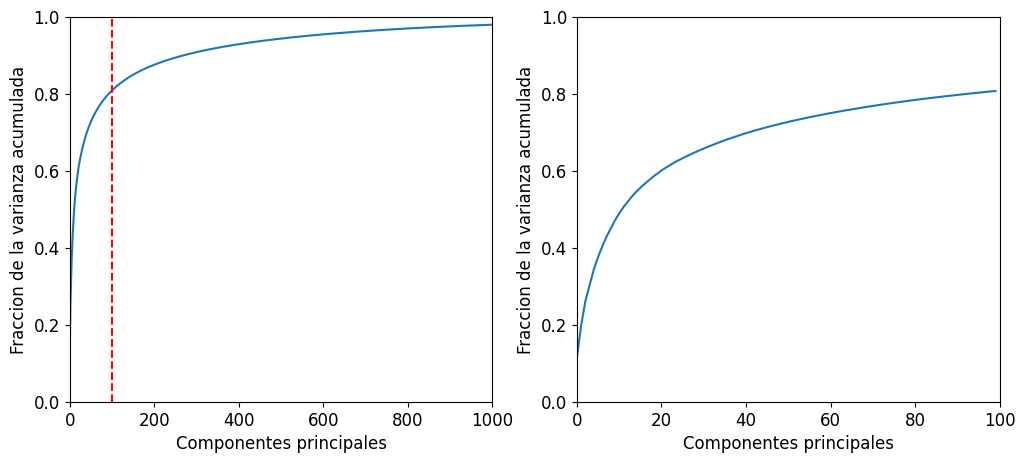

In [ ]:
#Celda para mostrar cuánto de la varianza estamos tomando
pca0 = PCA(n_components=1000, random_state=22)
pca0.fit(feat)
fig,ax=plt.subplots(1,2,figsize=(12,5))
ax[0].plot(range(0,1000),[0]+np.cumsum(pca0.explained_variance_ratio_))
ax[0].axvline(x=100,c="r",linestyle="--")
ax[0].set_ylim(0,1)
ax[0].set_xlim(0,1000)
ax[0].set_ylabel("Fraccion de la varianza acumulada")
ax[0].set_xlabel("Componentes principales")
pca1 = PCA(n_components=100, random_state=22)
pca1.fit(feat)
ax[1].plot(range(0,100),[0]+np.cumsum(pca1.explained_variance_ratio_))
ax[1].set_ylim(0,1)
ax[1].set_xlim(0,100)
ax[1].set_ylabel("Fraccion de la varianza acumulada")
ax[1].set_xlabel("Componentes principales")
plt.savefig(image_path+"/../../principal_components_variance.png")
plt.show()

In [ ]:
import pickle

# Guardar el DataFrame usando pickle
ruta_pickle = "/content/drive/MyDrive/Datamining aplicado a Ciencia y Tecnología/Tp 1 - dmcyt/df_tp1.pkl"

# Guardar el DataFrame usando pickle
with open(ruta_pickle, 'wb') as archivo:
    pickle.dump(x, archivo)

##Para levantar los archivos

Texto para la **introducción** y **dataset de trabajo**:

## I.Introducción
Como establece la inspiración de donde fueron extraídas las imágenes de los vegetales que utilizaremos para clasificar, desde la producción de hortalizas hasta la entrega, varios pasos comunes se realizan manualmente, como recoger y clasificar verduras. Suponemos que, desde pequeñas/os, por asociación de forma y color logramos clasificarlos visualmente sin dificultades pero, ¿podrá un algoritmo hacerlo por nosotros? ¿Podríamos lograr que una máquina automatice algunos de esos procesos manuales?



## II.Dataset
Para el presente trabajo se cuenta con un dataset de 3000 imágenes de 224x224 de 15 categorías de vegetales extraídas de los datasets de Kaggle (cita para el uso de las imágenes: https://www.researchgate.net/publication/352846889_DCNN-Based_Vegetable_Image_Classification_Using_Transfer_Learning_A_Comparative_Study)

Tendríamos que escribir algo del preprocesamiento y extracción de features no?

In [8]:
#Leer el pickle
x=pd.read_pickle(image_path+"/../../df_tp1.pkl")

In [ ]:
#levantamos el df en un archivo pickle
import pickle

# Especifica la ruta del archivo pickle
ruta_guardado_pickle = image_path+"/../../df_preprocesado.pkl"


with open(ruta_guardado_pickle, 'rb') as archivo:
    df = pickle.load(archivo)

In [ ]:
df.shape

(3000, 150529)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,150519,150520,150521,150522,150523,150524,150525,150526,150527,label
0,59,54,75,62,58,77,63,61,80,59,...,137,140,145,133,133,139,161,161,167,Bean
1,81,76,160,65,62,141,39,37,109,9,...,21,41,67,79,97,127,108,129,159,Bean
2,135,140,141,134,139,140,133,138,139,133,...,153,155,192,154,156,193,157,159,196,Bean
3,217,202,189,217,202,189,217,202,189,220,...,67,105,116,69,106,117,69,106,117,Bean
4,96,148,119,89,139,110,75,117,92,60,...,133,137,178,136,140,181,151,155,197,Bean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,142,112,107,141,111,106,140,111,104,140,...,6,11,9,13,14,12,15,16,14,Tomato
2996,191,196,197,205,210,211,232,237,238,210,...,64,89,79,36,54,47,3,18,14,Tomato
2997,233,239,244,213,219,224,197,203,208,207,...,177,190,192,176,189,191,177,190,192,Tomato
2998,216,221,224,225,230,233,226,231,234,216,...,86,136,106,90,138,109,92,140,111,Tomato


## III. TENDENCIA AL CLUSTERING: ÍNDICE DE HOPKINS
(código tomado de https://matevzkunaver.wordpress.com/2017/06/20/hopkins-test-for-cluster-tendency/)

El método de Hopkins consiste en generar p puntos distribuidos al azar en el espacio muestral, y además extraer p puntos reales del dataset. Luego se calculan las distancias a los vecinos más próximos dentro del subconjunto de datos generados al azar (u) y dentro del subconjunto de datos extraídos del dataset (w), con estos se calcula el coeficiente de Hopkins (H). Si los nuevos puntos están igual de alejados que los tomados al azar, entonces sum(u) ~ sum(w) y H ~ 0.5. En cambio, si sum(u) >> sum(w), es decir que en promedio están menos agrupados los que se encuentran al azar, entonces H << 0.5.

In [ ]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(x):
    if isinstance(x, np.ndarray):
        d = x.shape[1]
        n = x.shape[0] # rows
    elif isinstance(x, pd.DataFrame):
        d = x.shape[1]
        n = len(x) # rows
    else:
        raise ValueError("Input should be a NumPy array or a pandas DataFrame")

    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(x)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(x,axis=0),np.amax(x,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(x[rand_X[j]].reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, ujd)
        H = 0
    return H

In [ ]:
print(f"El coeficiente de cluster de Hopkins sobre nuestro dataset es {hopkins(x):.2f}")

El coeficiente de cluster de Hopkins sobre nuestro dataset es 0.85


El  ́índice de Hopkins es una manera de medir la tendencia
que tienen los datos a formar clusters. Para ello, se calcula la
distancia a los vecinos mas próximos y se la compara con la distancia entre puntos generados al azar; si el  ́ındice presenta
un valor cercano a 0.5 significa que los datos presentan una distribución similar a los datos distribuídos de manera aleatoria. En nuestro caso, el índice de Hopkins es de 0.85 por lo que los datos poseen una tendencia a la clusterización y por tal motivo se procede al análisis y comparación de distintas técnicas de clustering

## IV. EXPLORACIÓN: CLUSTERING JERARQUICO

A modo exploratorio, se aplica la técnica de clustering jerárquico aglomerativo. Se utiliza la matriz de distancia Euclídea, dado que solo se trabaja con datos contínuos y naturalmente normalizados ya que varían entre 0 y 255. Como complemento se calcula el índice cofenético para determinar el método a aplicar.

In [ ]:
# Clustering (scipy)
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, set_link_color_palette
from scipy.spatial.distance import pdist, squareform
from scipy.cluster import hierarchy

In [ ]:
# Cluster jerárquico: función para calcular el índice cofenético de cada método
def Jerarquico(metodos, df, d): # lista de métodos, datos y matriz de distancia
    for i in metodos: # cada elemento de la lista de métodos
        z = linkage(d, i) # cluster jerárquico
        c, coph_dists = cophenet(z, pdist(df)) # cálculo del índice cofenético
        print("Índice cofenético para el método "+i+":",round(c,3))

In [ ]:
# la lista de métodos disponibles en la librería scipy
metodo = ["single","complete","average","weighted","centroid","median","ward"]

In [ ]:
d_meta = squareform(pdist(x, 'euclidean'))

In [ ]:
# Índices cofenéticos para el dataset con distancia euclídea
Jerarquico(metodo, x, d_meta)

Índice cofenético para el método single: 0.436
Índice cofenético para el método complete: 0.667
Índice cofenético para el método average: 0.731
Índice cofenético para el método weighted: 0.678
Índice cofenético para el método centroid: 0.72
Índice cofenético para el método median: 0.631
Índice cofenético para el método ward: 0.424


El método con mayor índice cofenético es el método "average", con un valor de 0.731, este método calcula por parejas las disimilitudes entre las observaciones, escogiendo la media de las distancias. Para el cálculo del dendograma se considera entonces la matriz de distancia euclídea y el método average.

<Figure size 640x480 with 0 Axes>

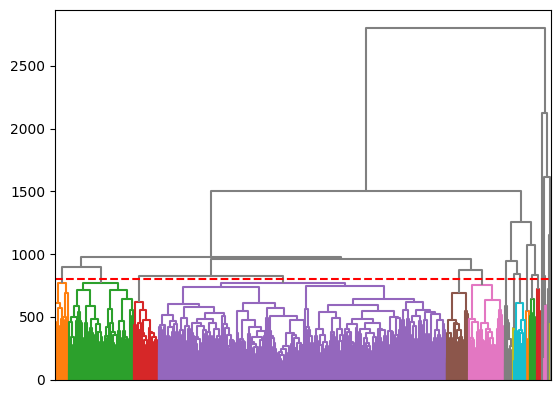

<Figure size 640x480 with 0 Axes>

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import squareform

# Dendrograma para el dataset completo, distancia euclídea y método "average"
z_df = linkage(d_meta, "average")

hierarchy.dendrogram(z_df, color_threshold=800, above_threshold_color='grey',no_labels=True)
plt.axhline(y=800, color='r', linestyle='--')
plt.figure()


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# Realizamos el clustering jerárquico con 15 clusters
k = 15
clusters = fcluster(z_df, 15, criterion='maxclust', depth=15)

print(clusters)
print(set(clusters))

[3 3 3 ... 3 3 3]
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}


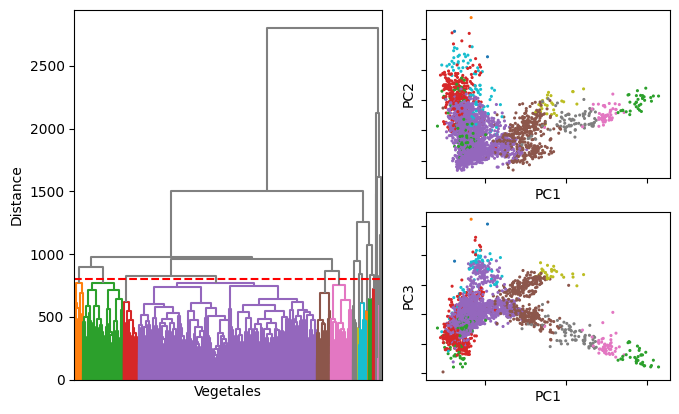

In [ ]:
#Celda para hacer figura
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
gs1 = gridspec.GridSpec(2,2)
gs1.update(left=0.6, right=0.98, wspace=0.05)
ax1 = plt.subplot(gs1[0, :])
ax2 = plt.subplot(gs1[1, :],sharex=ax1)

gs2 = gridspec.GridSpec(1, 1)
gs2.update(left=0.05, right=0.53, hspace=0.05)
ax4 = plt.subplot(gs2[0,0])
#ax4.set_aspect('equal', adjustable='box')
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax1.get_yticklabels(), visible=False)

colorlist=['tab:blue','tab:orange','tab:green','tab:red',
'tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan','tab:blue','tab:orange','tab:green','tab:red',
'tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan','tab:blue','tab:orange','tab:green','tab:red']
clustfactor=[colorlist[a+1] for a in clusters]
ax1.scatter(x[:,0],x[:,1],c=clustfactor,s=1.5)
ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")

ax2.scatter(x[:,0],x[:,2],c=clustfactor,s=1.5)
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC3")


hierarchy.dendrogram(z_df, color_threshold=800, above_threshold_color='grey',no_labels=True,ax=ax4)
plt.axhline(y=800, color='r', linestyle='--')
ax4.set_xlabel("Vegetales")
ax4.set_ylabel("Distance")

plt.savefig(image_path+"/../../hierarchical_dendrogram_and_projections.png",bbox_inches='tight')
plt.show()


#### Validación externa

##### Matriz de confusión

In [ ]:
clase = df['label'] #verdaderas etiquetas

In [ ]:
ct_jerarq = pd.crosstab(clase,clusters)
ct_jerarq

col_0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
label,,,,,,,,,,,,,,,
Bean,9,0,191,0,0,0,0,0,0,0,0,0,0,0,0
Bitter_Gourd,0,0,200,0,0,0,0,0,0,0,0,0,0,0,0
Bottle_Gourd,7,95,98,0,0,0,0,0,0,0,0,0,0,0,0
Brinjal,0,89,78,0,0,0,0,28,0,0,0,5,0,0,0
Broccoli,0,2,59,139,0,0,0,0,0,0,0,0,0,0,0
Cabbage,0,0,1,169,1,0,29,0,0,0,0,0,0,0,0
Capsicum,33,102,62,0,0,0,0,0,0,0,0,0,2,1,0
Carrot,0,0,200,0,0,0,0,0,0,0,0,0,0,0,0
Cauliflower,0,0,3,41,51,71,0,0,0,0,33,0,0,0,1


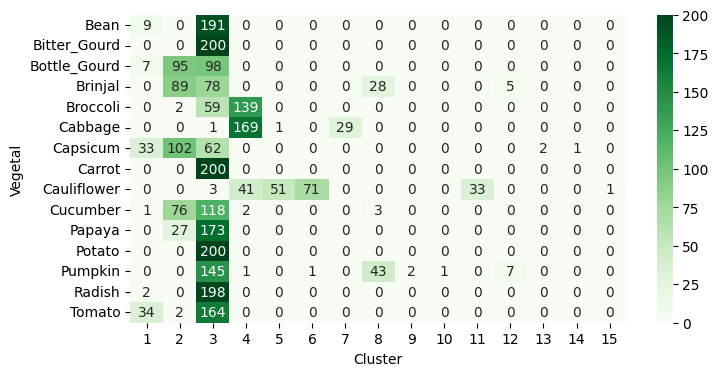

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,4))
sns.heatmap(ct_jerarq,cmap='Greens',annot=True,fmt='g')
plt.xlabel("Cluster")
plt.ylabel("Vegetal")
plt.savefig(image_path+"/../../hierarchical_confusion_matrix.png")
plt.show()

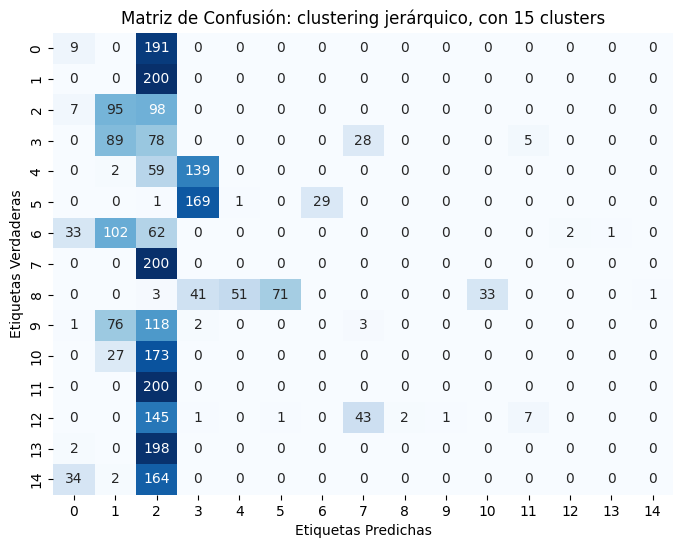

In [ ]:
#otra visualización:

import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(ct_jerarq, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=range(15), yticklabels=range(15))
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.title("Matriz de Confusión: clustering jerárquico, con 15 clusters")
plt.show()

Si hacemos en el dendograma un corte para obtener 15 clusters, se observa que el cluster 4 tiene una gran acumulación de observaciones coincidente con lo que se observa luego en la matriz de confusión.

##### Índice de Van Dongen

In [ ]:
#función que utilizaremos para distintos métodos
def vanDongen(ct):
    n2=2*(sum(ct.apply(sum,axis=1)))
    sumi = sum(ct.apply(np.max,axis=1))
    sumj = sum(ct.apply(np.max,axis=0))
    maxsumi = np.max(ct.apply(sum,axis=1))
    maxsumj = np.max(ct.apply(sum,axis=0))
    vd = (n2 - sumi - sumj)/(n2 - maxsumi - maxsumj)
    return vd

In [ ]:
print(f"Van Dongen para Clustering Jerárquico Aglomerativo: {vanDongen(ct_jerarq)}")

Van Dongen para Clustering Jerárquico Aglomerativo: 0.7664961636828644


##### Índice Rand Ajustado

In [ ]:
adjusted_rand_score (clase,clusters)

0.07526107684007136

## V. k-MEANS

El método de agrupamiento no supervisado conocido como K-means tiene como objetivo particionar un conjunto de n observaciones en k grupos, en los cuales los datos se agrupan de tal manera que los puntos en el mismo clúster sean más similares entre sí que los puntos en otros clusters. Un aspecto esencial para implementar este algoritmo es determinar adecuadamente el número de agrupamientos (k). En este informe, se determinó este valor utilizando dos técnicas: el "método del codo", que implica graficar la suma de los errores cuadrados (SSE) en función de k. Este método es heurístico y busca seleccionar la cantidad de grupos de manera que la adición de uno más no reduzca de manera significativa la varianza explicada. Ya que esta metodología puede resultar poco clara en ocasiones, se complementa con la técnica de validación interna de silhouette, en la cual se calcula y grafica el coeficiente de silhouette para diferentes cantidades de grupos. Este coeficiente es una medida de cuán similares son los datos dentro de un grupo en comparación con otros clústers. Un valor cercano a 1 indica que los datos dentro de un grupo son muy similares pero muy diferentes a los de otros grupos. Se considera k adecuado aquel que minimiza SSE y maximiza el índice de silhouette. Sin embargo, dado que estos valores no siempre coinciden, se busca un compromiso entre ambas condiciones.
En nuestro caso, al tener la cantidad de clases de vegetales (15) se utilizaron ambos coeficientes de validación interna para determinar si el número óptimo de clusters coincide con la cantidad de clases.

Como método de validación externa, se utilizó la matriz de confusión y los índices de Van Dongen y Rand como métodos de comparación de los clusters obtenidos con las verdaderas clases.

Funciones a utilizar:

In [ ]:
# Funciones para KMeans
# Silhouette Index: Función para calcularlo para cada número de clusters con KMeans
def SilIndex1(maxClusters,df):
    silI = [] # lista de índice
    for i in range(2, maxClusters): # itera entre 2 y el número de clusters máximo establecido
        modelo = KMeans(n_clusters=i, random_state=55).fit(df) # aplica el modelo deseado
        sil_avg = silhouette_score(df, modelo.labels_) # calcular el índice Silhouette promedio de todo
        silI.append(sil_avg)
        print("Silhouette index (promedio) para "+str(i)+" clusters: ",round(sil_avg,3)) #imprime el resultado
        cluster_labels = modelo.labels_ # Las etiquetas de los clusters
        n_clusters=i # La cantidad de clusters
        sample_sil_values = silhouette_samples(df, modelo.labels_) # Los valores de SilIndex para cada registro
        for j in range(n_clusters): # Itera en la cantidad de clusters armados
            jth_cluster_sil_values = sample_sil_values[cluster_labels == j] # Los valores de SilIndex para el cluster J
            jth_cluster_sil_avg = np.mean(jth_cluster_sil_values) # El promedio de valores de SilIndex para el cluster J
            print("Silhouette index para el cluster "+str(j)+":", round(jth_cluster_sil_avg,3)) # imprime los resultados
        print() # imprime un espacio al final
    plt.plot(range(2, maxClusters), silI, color="Grey") # Gráfico
    #plt.title('Método del bastón roto')
    plt.xlabel('Cantidad de clusters')
    plt.ylabel('Índice Silhouette')
    plt.show()
    print(silI)


# Método del bastón roto: Función para realizarlo roto con el KMeans
def Baston1(maxClusters,df):
    sse = [] # Lista de los errores
    for i in range(1, maxClusters): # Itera entre 1 y el número máximo de clusters deseados
        modelo = KMeans(n_clusters=i, random_state=55)
        modelo.fit(df) # Fitea el modelo
        sse.append(modelo.inertia_) # Agrega el resultado a la lista
    plt.plot(range(1, maxClusters), sse, color="Grey") # Gráfico
    plt.axvline(x=20,ymin=0,ymax=1,c="r",linestyle="--")
    plt.title('Método del bastón roto')
    plt.xlabel('Cantidad de clusters')
    plt.ylabel('SSE')
    plt.savefig(image_path+f"/../../elbow_plot_{maxClusters}.png")
    plt.show()

    print(sse)


# Gráfico de Silhouette: función para graficarlo por cada número de clusters con KMeans
def GrafSil1(maxClusters,df):
    for i in range(2, maxClusters): # itera entre 2 y el número de clusters máximo establecido
        modelo = KMeans(n_clusters=i, random_state=55).fit(df) # aplica el modelo deseado
        sil_avg = silhouette_score(df, modelo.labels_) # calcular el índice Silhouette promedio de todo

        cluster_labels = modelo.labels_ # Las etiquetas de los clusters
        n_clusters=i # La cantidad de clusters
        sample_sil_values = silhouette_samples(df, modelo.labels_)

        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(10, 6)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

        y_lower = 10
        for j in range(n_clusters):
            jth_cluster_sil_values = sample_sil_values[cluster_labels == j]
            jth_cluster_sil_avg = np.mean(jth_cluster_sil_values)
            jth_cluster_sil_values.sort()
            size_cluster_j = jth_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_j

            #color = cm.nipy_spectral(float(j) / n_clusters)
            color = cmRoyal(float(j) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, jth_cluster_sil_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Marcar los graficos de Silhouette con el numero de cluster
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))

            # Marcar los graficos de Silhouette con el Silhuette promedio del cluster
            ax1.text(0.6, y_lower + 0.5 * size_cluster_j, str(round(jth_cluster_sil_avg,3)))

            # Calcular donde comenzar el proximo grafixo
            y_lower = y_upper + 10 # Marco una distancia de 10 entre graficos para que haya un espacio

        ax1.set_xlabel("Coeficiente de silhouette")
        ax1.set_ylabel("Cluster label")

        # La linea vertical es el Silhouette promedio
        ax1.axvline(x=sil_avg, color="red", linestyle="--")

        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.savefig(image_path+f"/../../silhouette_plot_{maxClusters}.png")
        plt.show()


# Matríz de confusión: función para realizarla por cada número de clusters con KMeans
def CM1(maxClusters,df):
    for i in range(2, maxClusters): # Itera entre 1 y el número máximo de clusters deseados
        modelo = KMeans(n_clusters=i, random_state=55).fit(df)
        cluster_labels = modelo.labels_
        tmp = pd.DataFrame({'Labels': clase, 'Clusters': modelo.labels_})# Crear un DataFrame con Labels y Clusters como columnas
        ct = pd.crosstab(tmp['Labels'], tmp['Clusters']) # Crea una matriz de confusion
        print(ct)
        print()


# Adjusted Rand Index: función para calcularlo para cada número de clusters con KMeans
def RandIndex1(maxClusters,df,classes):
    for i in range(2, maxClusters): # itera entre 2 y el número de clusters máximo establecido
        modelo = KMeans(n_clusters=i, random_state=55).fit(df) # aplica el modelo deseado
        ari = adjusted_rand_score(classes, modelo.labels_) # calcula el índice Rand
        print("Rand index para "+str(i)+" clusters: ",round(ari,3)) #imprime el resultado


# Van Dongen: función para calcular el índice de Van Dongen para cada número de clusters con KMeans
def VDIndex1(maxClusters,df):
    for i in range(2, maxClusters): # Itera entre 1 y el número máximo de clusters deseados
        modelo = KMeans(n_clusters=i, random_state=55).fit(df)
        cluster_labels = modelo.labels_
        tmp = pd.DataFrame({'Labels': clase, 'Clusters': modelo.labels_})# Crear un DataFrame con Labels y Clusters como columnas
        ct = pd.crosstab(tmp['Labels'], tmp['Clusters']) # Crea una matriz de confusion
        VD = vanDongen(ct)
        print("Van Dongen index para "+str(i)+" clusters: ",round(VD,3))

In [ ]:
#indicamos n_clusters 15 por ser la cantidad de especies
kmeans = KMeans(n_clusters=15)
kmeans.fit(x)

KMeans(n_clusters=15)

### Cantidad de clusters

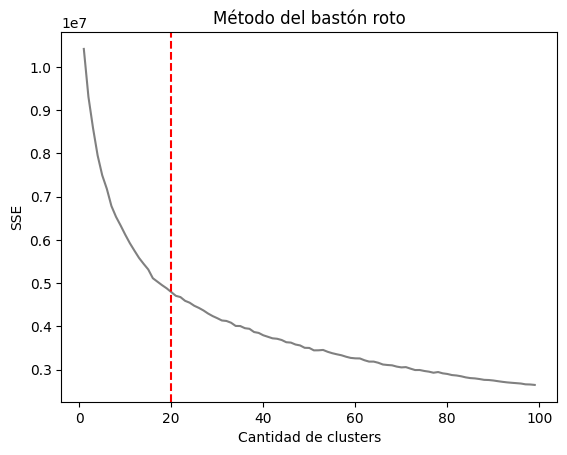

[10413287.0, 9308174.0, 8584030.0, 7951856.0, 7493402.0, 7180181.5, 6782762.0, 6533065.5, 6332681.0, 6121708.0, 5924948.0, 5751473.0, 5583572.0, 5446593.0, 5317377.0, 5114762.0, 5034219.5, 4954295.0, 4881498.0, 4794378.5, 4707783.0, 4678446.0, 4592682.5, 4548862.0, 4478158.5, 4428775.0, 4369793.0, 4298791.0, 4239669.0, 4191174.0, 4138101.0, 4126804.5, 4086137.5, 4011938.75, 4009383.5, 3960190.5, 3945431.5, 3871026.0, 3850621.0, 3796057.5, 3761325.0, 3725948.5, 3715609.5, 3687009.5, 3635398.5, 3626998.0, 3582611.5, 3561755.5, 3506541.5, 3503479.75, 3447679.5, 3448829.5, 3456946.0, 3414309.5, 3381646.0, 3356380.5, 3333834.0, 3300107.0, 3273130.5, 3262900.75, 3260596.25, 3218686.5, 3187829.5, 3187639.5, 3160496.75, 3120669.0, 3109145.5, 3101573.25, 3072346.5, 3053985.75, 3060186.0, 3024989.5, 2992541.0, 2993385.5, 2971058.0, 2955347.75, 2930532.5, 2946491.0, 2916768.25, 2902187.75, 2876782.25, 2866965.0, 2848596.5, 2823295.5, 2806522.25, 2799453.0, 2784682.0, 2766278.25, 2762209.5, 275125

In [ ]:
# Método del bastón roto
Baston1(100,x)

In [ ]:
# Calcular SSE (Sum of Squared Errors)
sse = np.sum((x - kmeans.cluster_centers_[kmeans.labels_]) ** 2)
print("SSE:", sse)

SSE: 5291539.5


#### Validación interna

**Silhouette**

Silhouette index (promedio) para 2 clusters:  0.14
Silhouette index para el cluster 0: 0.141
Silhouette index para el cluster 1: 0.136

Silhouette index (promedio) para 3 clusters:  0.116
Silhouette index para el cluster 0: 0.403
Silhouette index para el cluster 1: 0.091
Silhouette index para el cluster 2: 0.113

Silhouette index (promedio) para 4 clusters:  0.12
Silhouette index para el cluster 0: 0.111
Silhouette index para el cluster 1: 0.416
Silhouette index para el cluster 2: 0.093
Silhouette index para el cluster 3: 0.104

Silhouette index (promedio) para 5 clusters:  0.134
Silhouette index para el cluster 0: 0.16
Silhouette index para el cluster 1: 0.088
Silhouette index para el cluster 2: 0.391
Silhouette index para el cluster 3: 0.218
Silhouette index para el cluster 4: 0.113

Silhouette index (promedio) para 6 clusters:  0.139
Silhouette index para el cluster 0: 0.116
Silhouette index para el cluster 1: 0.391
Silhouette index para el cluster 2: 0.212
Silhouette index para el 

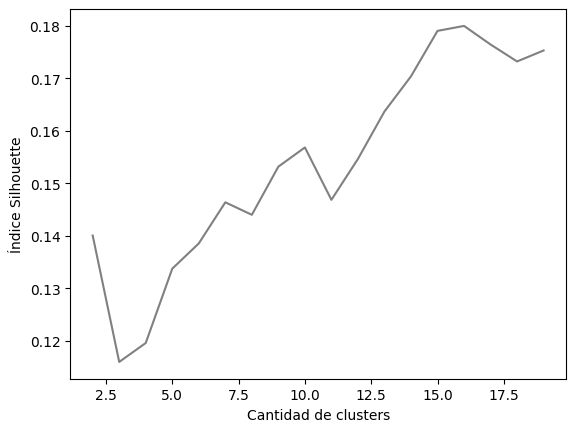

[0.14006181, 0.115976624, 0.11958555, 0.13375051, 0.13856068, 0.1463981, 0.14401887, 0.15319976, 0.15685262, 0.14687243, 0.154668, 0.16370663, 0.17041406, 0.17907552, 0.18001963, 0.17648004, 0.1732455, 0.17534065]


In [ ]:
SilIndex1(20,x)

Se calculó el índice Silhouette para el rango de 2 a 20 clusters, obteniendo un valor óptimo de separación en 16 clusters y muy similar a la configuración en 15 clusters, como la cantidad de clases, por lo que podríamos probar con un k-means de 15.

In [ ]:
# Gráfico de silhouette
def plot_sil(df,n_clusters,cluster_ids,cluster_labels,sample_silhouette_values,silhouette_avg):
    ith_cluster_silhouette_avg = []
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == cluster_ids[i]]
        ith_cluster_silhouette_avg.append(np.mean(ith_cluster_silhouette_values))
    #ith_cluster_silhouette_avg

    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(10, 6)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == cluster_ids[i]]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        #color = cm.nipy_spectral(float(i) / n_clusters)
        color = cmRoyal(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Marcar los graficos de Silhouette con el numero de cluster
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Marcar los graficos de Silhouette con el Silhuette promedio del cluster
        ax1.text(0.6, y_lower + 0.5 * size_cluster_i, str(round(ith_cluster_silhouette_avg[i],3)))

        # Calcular donde comenzar el proximo grafixo
        y_lower = y_upper + 10 # Marco una distancia de 10 entre graficos para que haya un espacio

    ax1.set_xlabel("Coeficiente de silhouette")
    ax1.set_ylabel("Cluster label")

    # La linea vertical es el Silhouette promedio
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.savefig(image_path+f"/../../silhouette_evaluation_plot_{maxClusters}.png")

    plt.show()
    return ith_cluster_silhouette_avg

### Ajuste con 15 clusters

In [ ]:
# Estimar el coeficiente de Silhouette para cada cluster
n_clusters=15
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(x)
cluster_ids = list(set(kmeans.labels_))
cluster_labels = kmeans.labels_
sample_silhouette_values = silhouette_samples(x,cluster_labels)
silhouette_avg = silhouette_score(x,cluster_labels)

NameError: ignored

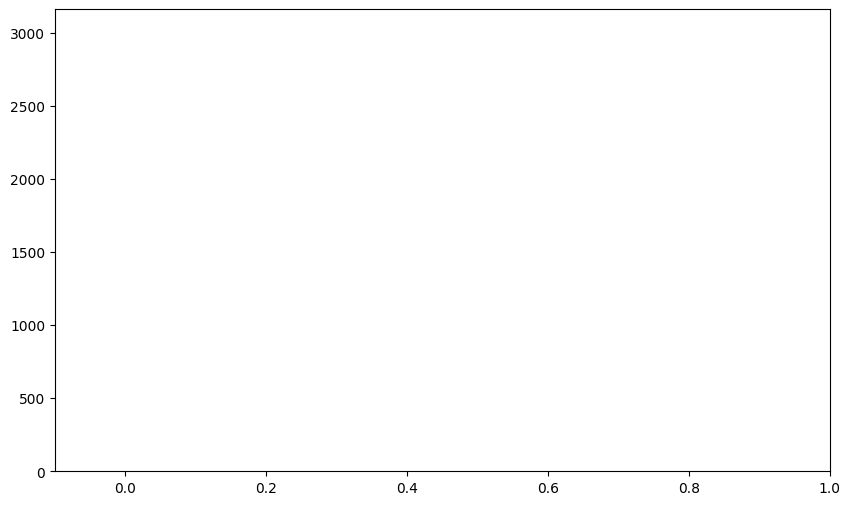

In [ ]:
plot_sil(df,n_clusters,cluster_ids,cluster_labels,sample_silhouette_values,silhouette_avg)

In [ ]:
# Gráfico de Silhouette
GrafSil1(20,x)

#### Validación externa

##### **Matríz de confusión**

In [ ]:
clase = df['label'] # la clase

In [ ]:
ctKmeans = pd.crosstab(clase,kmeans.labels_)

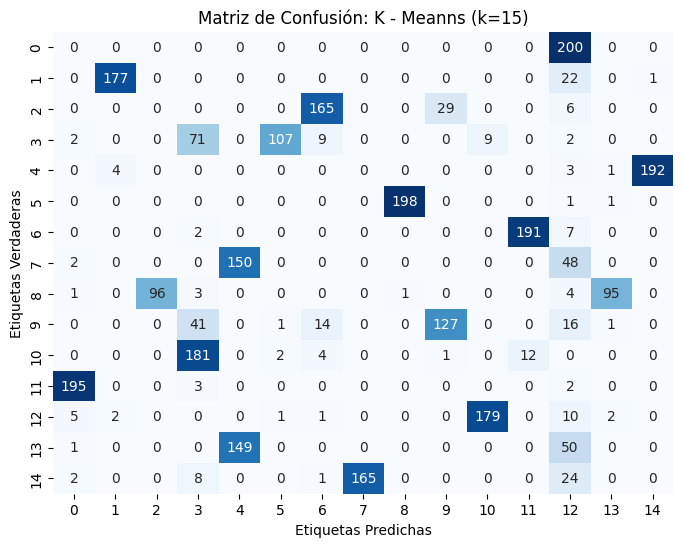

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(ctKmeans, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=range(15), yticklabels=range(15))
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.title("Matriz de Confusión: K - Meanns (k=15)")
plt.show()

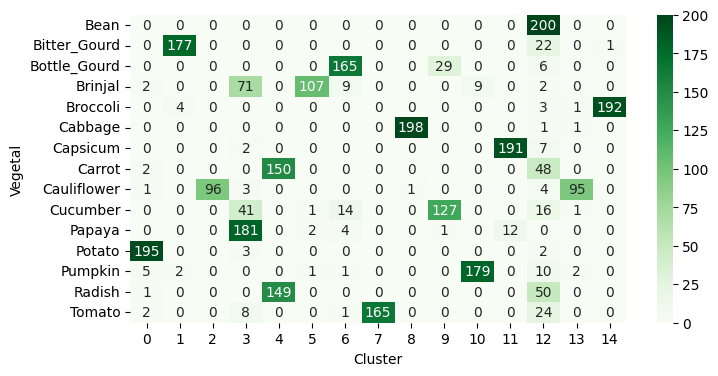

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,4))
sns.heatmap(ctKmeans,cmap='Greens',annot=True,fmt='g')
plt.xlabel("Cluster")
plt.ylabel("Vegetal")
plt.savefig(image_path+"/../../kmeans_confusion_matrix.png")
plt.show()

##### **Índice de Van Dongen**

In [ ]:
print(f"Van Dongen para K-means: {vanDongen(ctKmeans)}")

Van Dongen para K-means: 0.2053654024051804


##### **Índice Rand Ajustado**

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score (clase,kmeans.labels_)

0.6655158736581652

## VI. K-MEDOIDS

A diferencia del algoritmo k-means, PAM opta por seleccionar un punto de los datos como centro y se basa en una métrica de distancias entre los puntos. Es más robusto ante el ruido que k-means porque minimiza la suma de disimilitudes (entre pares de puntos) en lugar de la suma de distancias euclidianas al cuadrado. De esta manera, un medoide puede definirse como el objeto de un grupo cuya disimilitud media con todos los objetos en el grupo es mínima: es el punto ubicado más hacia el centro de todo el grupo.
Al igual que con k-means, es necesario especificar el número de grupos k. Se realizó el mismo proceso de selección de k que en k-means y con el mismo objetivo de validar si el valor de k óptimo resulta cercano a la cantidad de clases de vegetales (k=15).

In [ ]:
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.5 MB/s eta 0:00:00


In [ ]:
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=15)
kmedoids.fit(x)
kmedoids_labels=kmedoids.labels_

In [ ]:
# Calcular SSE (Sum of Squared Errors)
sse = np.sum((x - kmedoids.cluster_centers_[kmedoids_labels]) ** 2)
print("SSE:", sse)

SSE: 8677294.0


### Cantidad de clusters

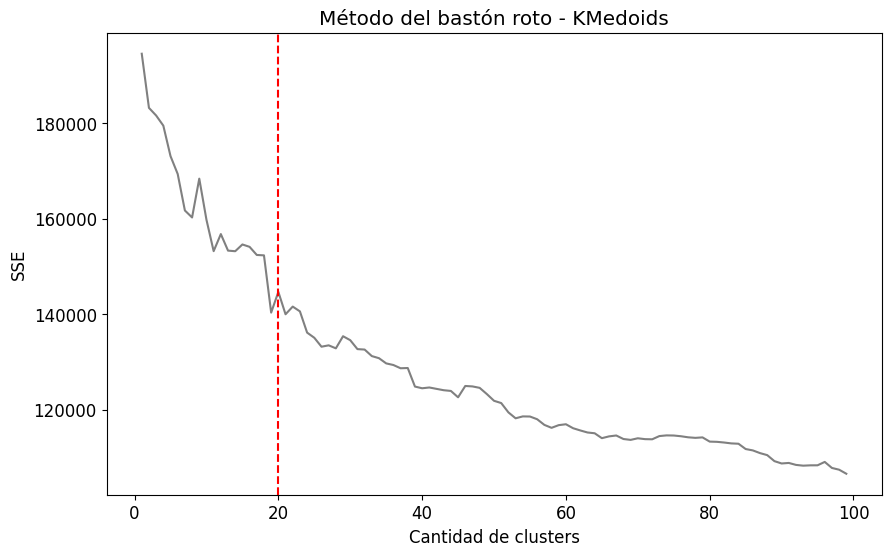

[194531.75, 183195.56, 181593.6, 179471.11, 173090.72, 169345.47, 161706.47, 160244.84, 168376.86, 159762.12, 153190.88, 156768.25, 153302.31, 153177.08, 154591.1, 154090.81, 152392.56, 152311.05, 140319.81, 144658.84, 139975.4, 141582.3, 140580.55, 136135.1, 135055.31, 133183.69, 133470.4, 132842.22, 135377.4, 134548.03, 132679.03, 132585.1, 131221.44, 130775.58, 129690.1, 129351.44, 128671.695, 128720.516, 124837.71, 124480.2, 124644.0, 124354.74, 124072.1, 123921.13, 122589.91, 124960.195, 124868.305, 124567.31, 123268.68, 121858.53, 121382.86, 119432.33, 118193.375, 118588.91, 118563.67, 117995.984, 116814.4, 116197.15, 116760.34, 116945.65, 116113.83, 115648.56, 115221.83, 115057.39, 114030.58, 114406.875, 114592.86, 113855.4, 113672.98, 114009.34, 113827.266, 113795.8, 114471.75, 114613.766, 114587.125, 114434.94, 114213.516, 114097.22, 114193.89, 113311.14, 113265.1, 113121.31, 112937.125, 112867.016, 111758.19, 111467.73, 110902.99, 110480.45, 109223.28, 108733.59, 108844.18, 1

In [ ]:
# Método del bastón roto
Baston2(100,x)

#### Validación interna

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples, adjusted_rand_score

# Calcular Silhouette Score
silhouette_avg = silhouette_score(x, kmedoids_labels)
print("Silhouette Score:", silhouette_avg)

# Calcular Silhouette Sample Values
silhouette_values = silhouette_samples(x, kmedoids_labels)

Silhouette Score: 0.059457894


In [ ]:
# Funciones para KMedoids
# Silhouette Index: Función para calcularlo para cada número de clusters con KMedoids
def SilIndex2(maxClusters,df):
    silII = [] # lista de índice
    for i in range(2, maxClusters): # itera entre 2 y el número de clusters máximo establecido
        modelo = KMedoids(n_clusters=i, random_state=55).fit(df) # aplica el modelo deseado
        sil_avg = silhouette_score(df, modelo.labels_) # calcular el índice Silhouette promedio de todo
        silII.append(sil_avg)
        print("Silhouette index (promedio) para "+str(i)+" clusters: ",round(sil_avg,3)) #imprime el resultado
        cluster_labels = modelo.labels_ # Las etiquetas de los clusters
        n_clusters=i # La cantidad de clusters
        sample_sil_values = silhouette_samples(df, modelo.labels_) # Los valores de SilIndex para cada registro
        for j in range(n_clusters): # Itera en la cantidad de clusters armados
            jth_cluster_sil_values = sample_sil_values[cluster_labels == j] # Los valores de SilIndex para el cluster J
            jth_cluster_sil_avg = np.mean(jth_cluster_sil_values) # El promedio de valores de SilIndex para el cluster J
            print("Silhouette index para el cluster "+str(j)+":", round(jth_cluster_sil_avg,3)) # imprime los resultados
        print() # imprime un espacio al final
    plt.plot(range(2, maxClusters), silII, color="Grey") # Gráfico
    #plt.title('Método del bastón roto')
    plt.xlabel('Cantidad de clusters')
    plt.ylabel('Índice Silhouette')
    plt.show()
    print(silII)


# Método del bastón roto: Función para realizarlo roto con el KMedoids
def Baston2(maxClusters,df):
    sse = [] # Lista de los errores
    for i in range(1, maxClusters): # Itera entre 1 y el número máximo de clusters deseados
        modelo = KMedoids(n_clusters=i, random_state=55)
        modelo.fit(df) # Fitea el modelo
        sse.append(modelo.inertia_) # Agrega el resultado a la lista
    plt.plot(range(1, maxClusters), sse, color="Grey") # Gráfico
    plt.axvline(x=20,ymin=0,ymax=1,c="r",linestyle="--")
    plt.title('Método del bastón roto - KMedoids')
    plt.xlabel('Cantidad de clusters')
    plt.ylabel('SSE')
    plt.savefig(image_path+f"/../../PAM_elbow_plot_{maxClusters}.png")
    plt.show()

    print(sse)


# Gráfico de Silhouette: función para graficarlo por cada número de clusters con KMedoids
def GrafSil2(maxClusters,df):
    for i in range(2, maxClusters): # itera entre 2 y el número de clusters máximo establecido
        modelo = KMedoids(n_clusters=i, random_state=55).fit(df) # aplica el modelo deseado
        sil_avg = silhouette_score(df, modelo.labels_) # calcular el índice Silhouette promedio de todo

        cluster_labels = modelo.labels_ # Las etiquetas de los clusters
        n_clusters=i # La cantidad de clusters
        sample_sil_values = silhouette_samples(df, modelo.labels_)

        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(10, 6)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

        y_lower = 10
        for j in range(n_clusters):
            jth_cluster_sil_values = sample_sil_values[cluster_labels == j]
            jth_cluster_sil_avg = np.mean(jth_cluster_sil_values)
            jth_cluster_sil_values.sort()
            size_cluster_j = jth_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_j

            #color = cm.nipy_spectral(float(j) / n_clusters)
            color = cmRoyal(float(j) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, jth_cluster_sil_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Marcar los graficos de Silhouette con el numero de cluster
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))

            # Marcar los graficos de Silhouette con el Silhuette promedio del cluster
            ax1.text(0.6, y_lower + 0.5 * size_cluster_j, str(round(jth_cluster_sil_avg,3)))

            # Calcular donde comenzar el proximo grafixo
            y_lower = y_upper + 10 # Marco una distancia de 10 entre graficos para que haya un espacio

        ax1.set_xlabel("Coeficiente de silhouette")
        ax1.set_ylabel("Cluster label")

        # La linea vertical es el Silhouette promedio
        ax1.axvline(x=sil_avg, color="red", linestyle="--")

        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.savefig(image_path+f"/../../PAM_silhouette_plot_{maxClusters}.png")
        plt.show()



# Adjusted Rand Index: función para calcularlo para cada número de clusters con KMeans
def RandIndex2(maxClusters,df,classes):
    for i in range(2, maxClusters): # itera entre 2 y el número de clusters máximo establecido
        modelo = KMedoids(n_clusters=i, random_state=55).fit(df) # aplica el modelo deseado
        ari = adjusted_rand_score(classes, modelo.labels_) # calcula el índice Rand
        print("Rand index para "+str(i)+" clusters: ",round(ari,3)) #imprime el resultado


# Van Dongen: función para calcular el índice de Van Dongen para cada número de clusters con KMeans
def VDIndex2(maxClusters,df):
    for i in range(2, maxClusters): # Itera entre 1 y el número máximo de clusters deseados
        modelo = KMedoids(n_clusters=i, random_state=55).fit(df)
        cluster_labels = modelo.labels_
        tmp = pd.DataFrame({'Labels': clase, 'Clusters': modelo.labels_})# Crear un DataFrame con Labels y Clusters como columnas
        ct = pd.crosstab(tmp['Labels'], tmp['Clusters']) # Crea una matriz de confusion
        VD = vanDongen(ct)
        print("Van Dongen index para "+str(i)+" clusters: ",round(VD,3))

Silhouette index (promedio) para 2 clusters:  0.084
Silhouette index para el cluster 0: 0.083
Silhouette index para el cluster 1: 0.085

Silhouette index (promedio) para 3 clusters:  0.055
Silhouette index para el cluster 0: 0.013
Silhouette index para el cluster 1: 0.075
Silhouette index para el cluster 2: 0.075

Silhouette index (promedio) para 4 clusters:  0.041
Silhouette index para el cluster 0: 0.075
Silhouette index para el cluster 1: 0.019
Silhouette index para el cluster 2: 0.024
Silhouette index para el cluster 3: 0.025

Silhouette index (promedio) para 5 clusters:  0.055
Silhouette index para el cluster 0: 0.061
Silhouette index para el cluster 1: 0.056
Silhouette index para el cluster 2: 0.034
Silhouette index para el cluster 3: 0.005
Silhouette index para el cluster 4: 0.147

Silhouette index (promedio) para 6 clusters:  0.048
Silhouette index para el cluster 0: 0.03
Silhouette index para el cluster 1: 0.138
Silhouette index para el cluster 2: 0.003
Silhouette index para e

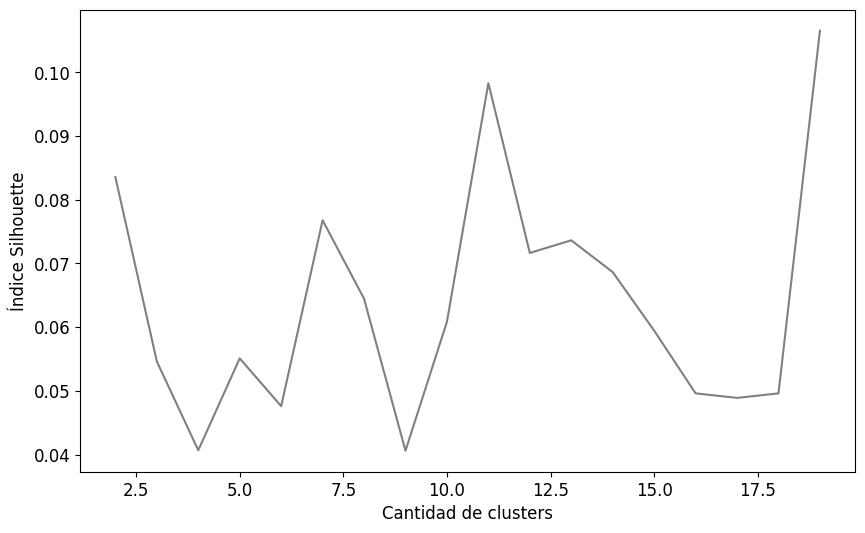

[0.083546594, 0.054626368, 0.04067839, 0.055102672, 0.047600366, 0.07677711, 0.06445956, 0.040607613, 0.060839303, 0.098292746, 0.071643226, 0.073628366, 0.0686364, 0.059457894, 0.049609646, 0.048900034, 0.049607493, 0.10651933]


In [ ]:
SilIndex2(20,x)

Se calculó el índice Silhouette para el rango de 2 a 20 clusters, obteniendo un valor óptimo de separación en 19 clusters (0.107), valor superior a la cantidad de categorías, mientras que el valor de silhouette para 15 clusters es de 0.059. De todos modos, en ambos casos resultan bajo considerando que el valor máximo podía ser 1.

In [ ]:
# Gráfico de silhouette
def plot_sil(df,n_clusters,cluster_ids,cluster_labels,sample_silhouette_values,silhouette_avg):
    ith_cluster_silhouette_avg = []
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == cluster_ids[i]]
        ith_cluster_silhouette_avg.append(np.mean(ith_cluster_silhouette_values))
    #ith_cluster_silhouette_avg

    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(10, 6)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == cluster_ids[i]]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        #color = cm.nipy_spectral(float(i) / n_clusters)
        color = cmRoyal(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Marcar los graficos de Silhouette con el numero de cluster
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Marcar los graficos de Silhouette con el Silhuette promedio del cluster
        ax1.text(0.6, y_lower + 0.5 * size_cluster_i, str(round(ith_cluster_silhouette_avg[i],3)))

        # Calcular donde comenzar el proximo grafixo
        y_lower = y_upper + 10 # Marco una distancia de 10 entre graficos para que haya un espacio

    ax1.set_xlabel("Coeficiente de silhouette")
    ax1.set_ylabel("Cluster label")

    # La linea vertical es el Silhouette promedio
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.savefig(image_path+f"/../../PAM_evaluation_plot_{n_clusters}.png")

    plt.show()
    return ith_cluster_silhouette_avg

### Ajuste con 19 clusters (óptimo)

In [ ]:
# Estimar el coeficiente de Silhouette para cada cluster
n_clusters=19
kmedoids = KMedoids(n_clusters=n_clusters)
kmedoids.fit(x)
cluster_ids = list(set(kmedoids.labels_))
cluster_labels = kmedoids.labels_
sample_silhouette_values = silhouette_samples(x,cluster_labels)
silhouette_avg = silhouette_score(x,cluster_labels)

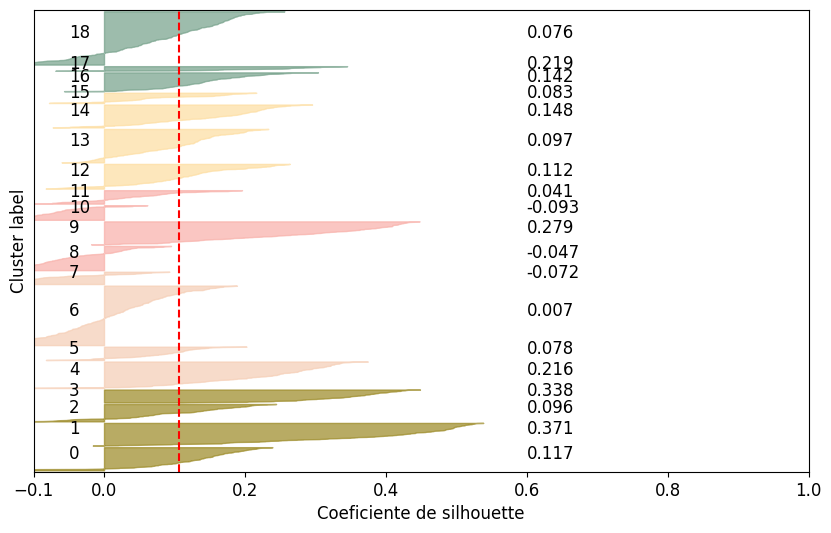

[0.1168457,
 0.37071362,
 0.095888734,
 0.337917,
 0.2158583,
 0.078187674,
 0.00725651,
 -0.072100885,
 -0.046878256,
 0.27916542,
 -0.09276856,
 0.040719345,
 0.112384066,
 0.096892044,
 0.14788823,
 0.083366856,
 0.14176059,
 0.21912557,
 0.07604237]

In [ ]:
plot_sil(df,n_clusters,cluster_ids,cluster_labels,sample_silhouette_values,silhouette_avg)

### Ajuste con 15 clusters

In [ ]:
# Estimar el coeficiente de Silhouette para cada cluster
n_clusters=15
kmedoids = KMedoids(n_clusters=n_clusters)
kmedoids.fit(x)
cluster_ids = list(set(kmedoids.labels_))
cluster_labels = kmedoids.labels_
sample_silhouette_values = silhouette_samples(x,cluster_labels)
silhouette_avg = silhouette_score(x,cluster_labels)

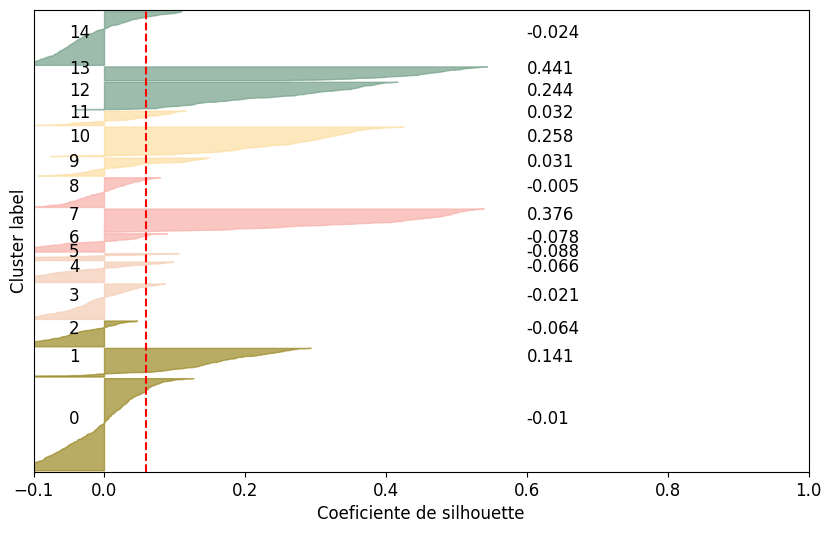

[-0.010240617,
 0.14074302,
 -0.06429539,
 -0.020730324,
 -0.06566454,
 -0.088406265,
 -0.07754444,
 0.37634492,
 -0.0054570166,
 0.031370126,
 0.25759473,
 0.03217899,
 0.24395052,
 0.4406003,
 -0.024035592]

In [ ]:
plot_sil(df,n_clusters,cluster_ids,cluster_labels,sample_silhouette_values,silhouette_avg)

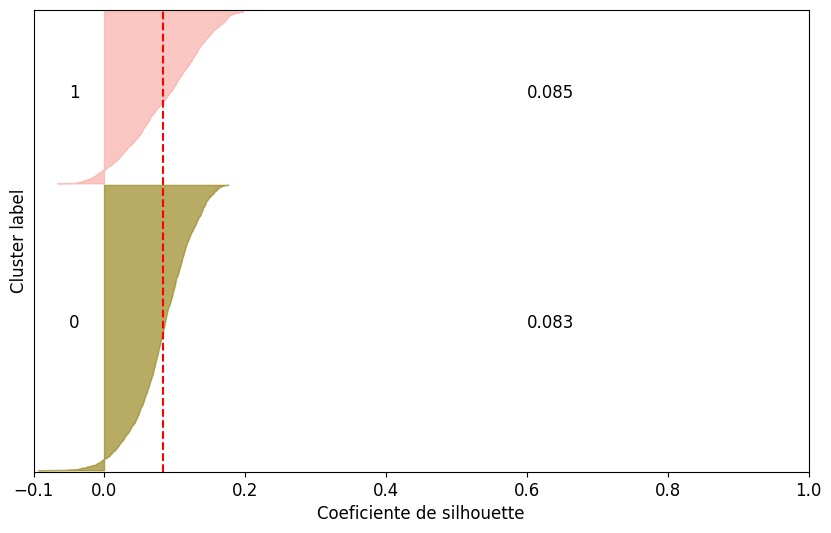

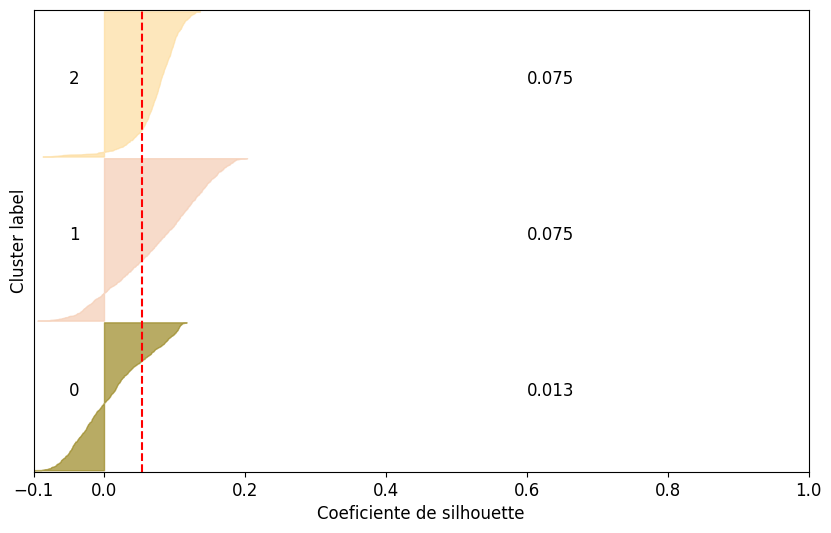

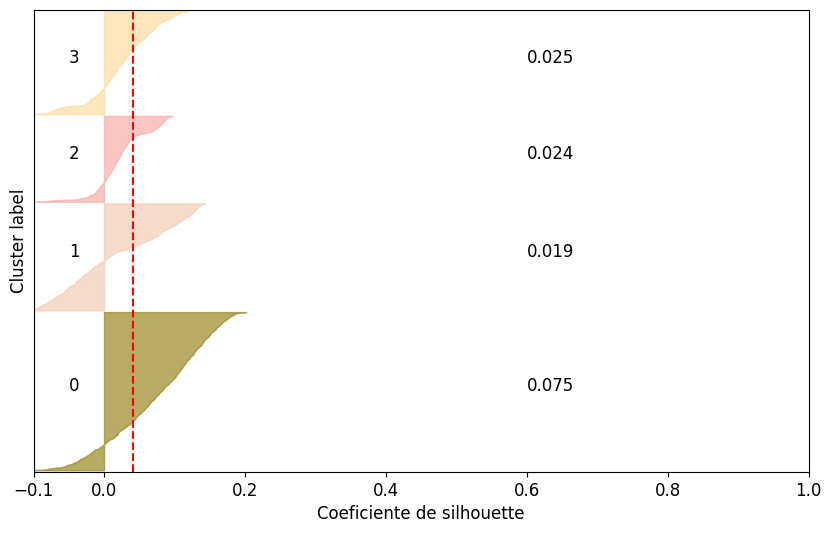

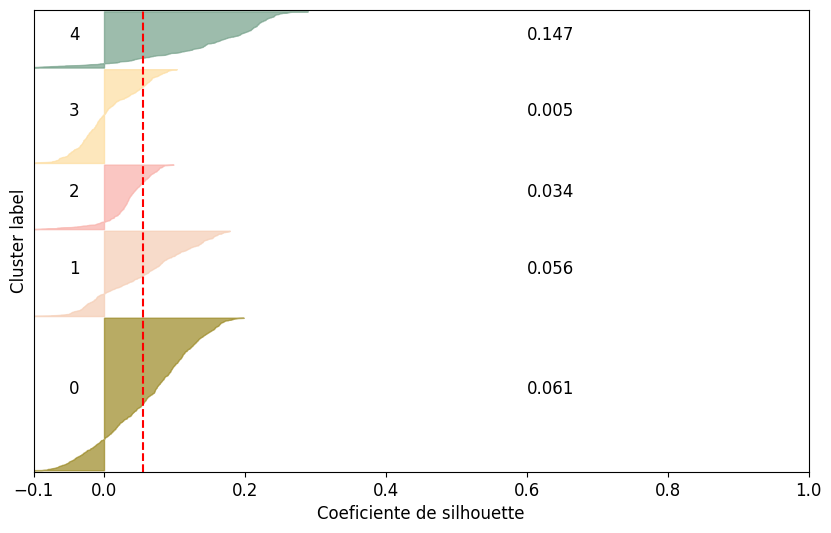

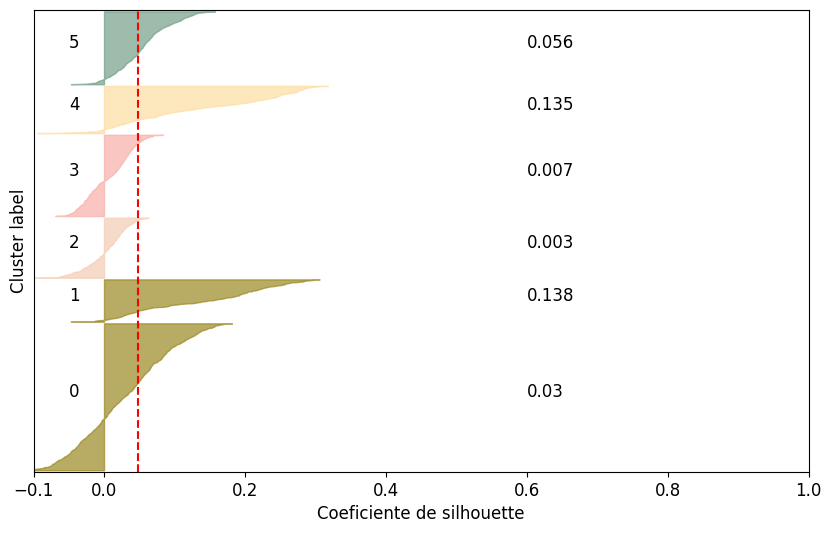

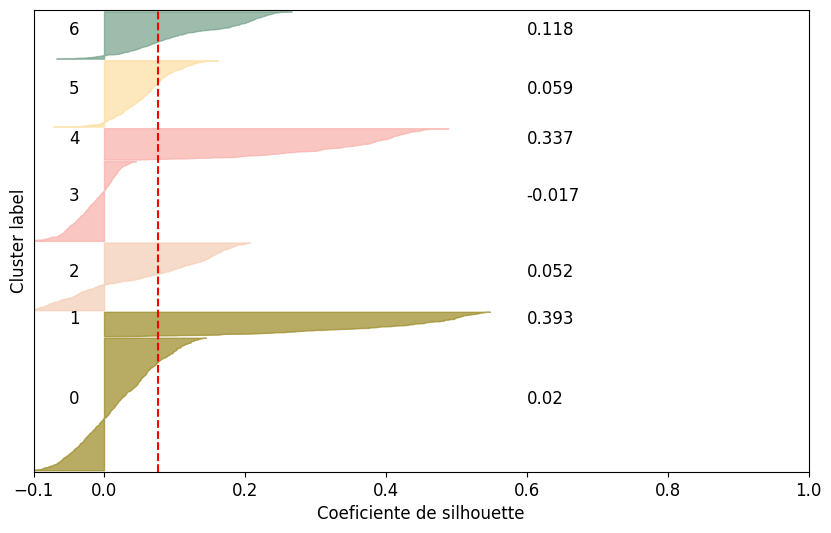

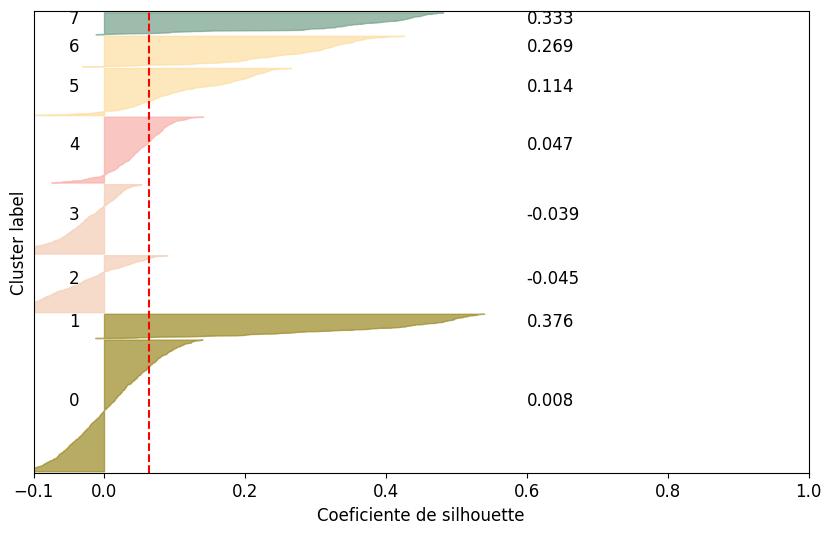

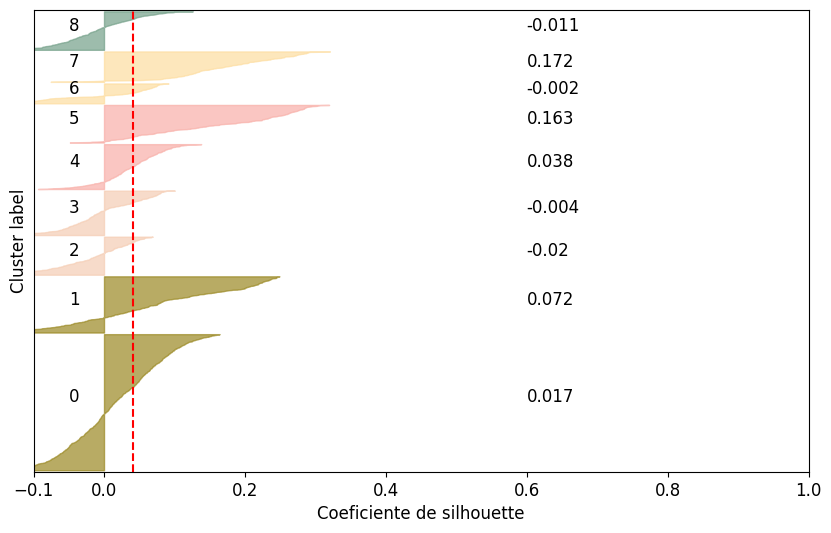

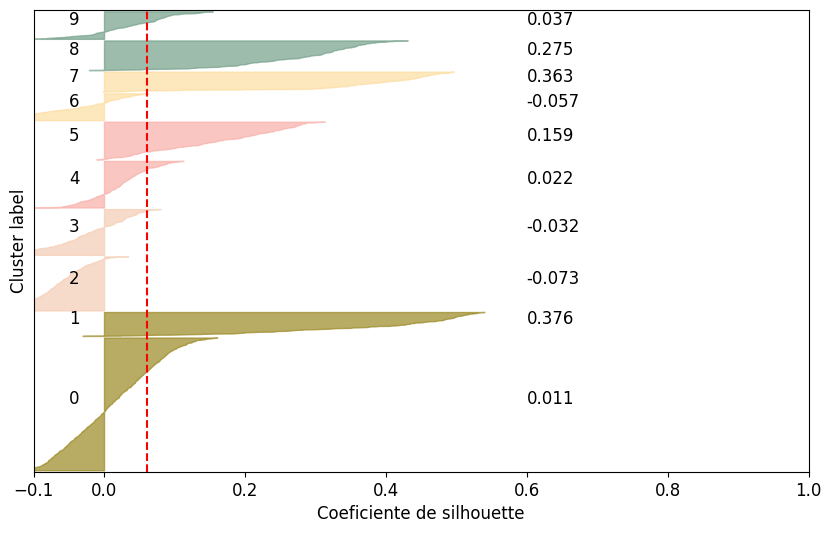

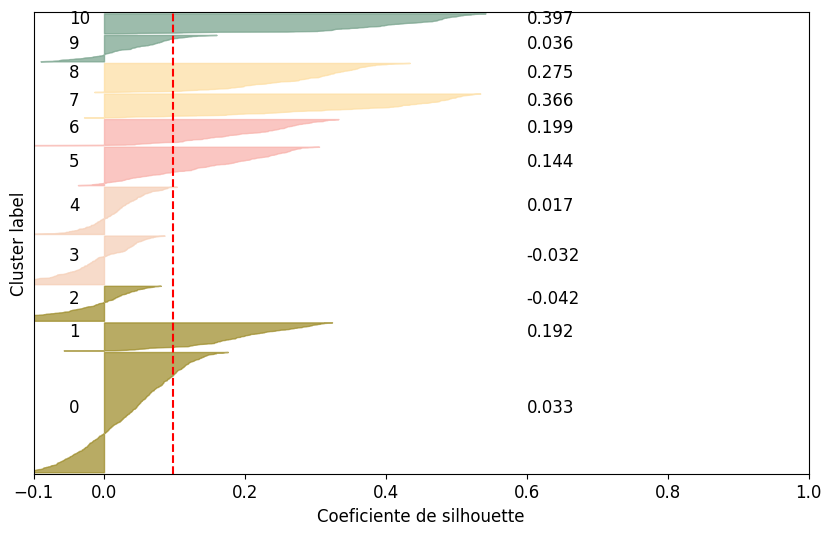

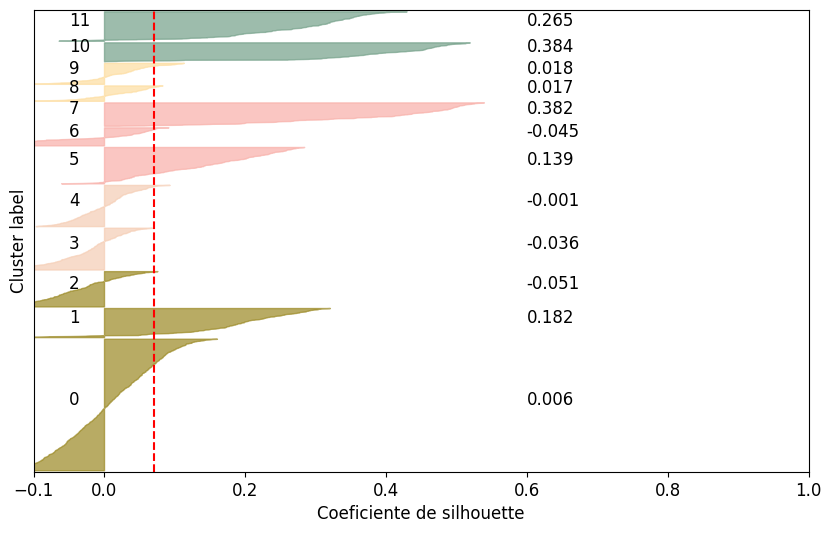

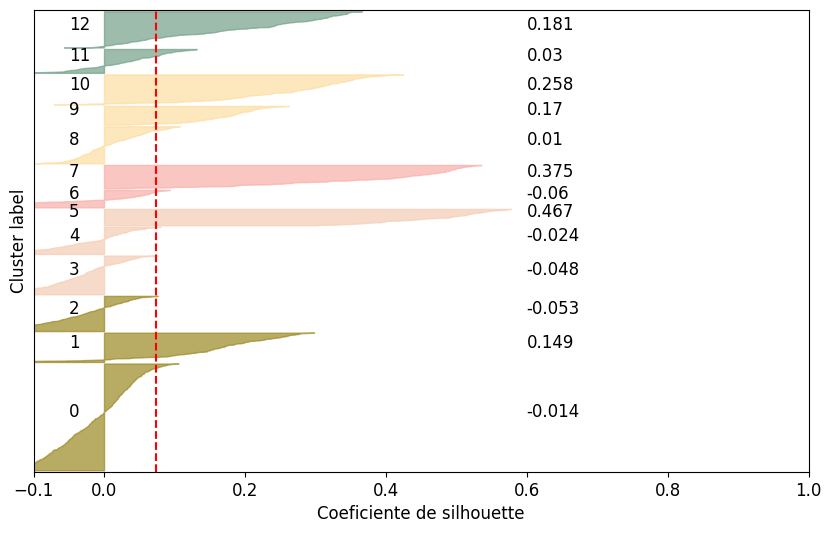

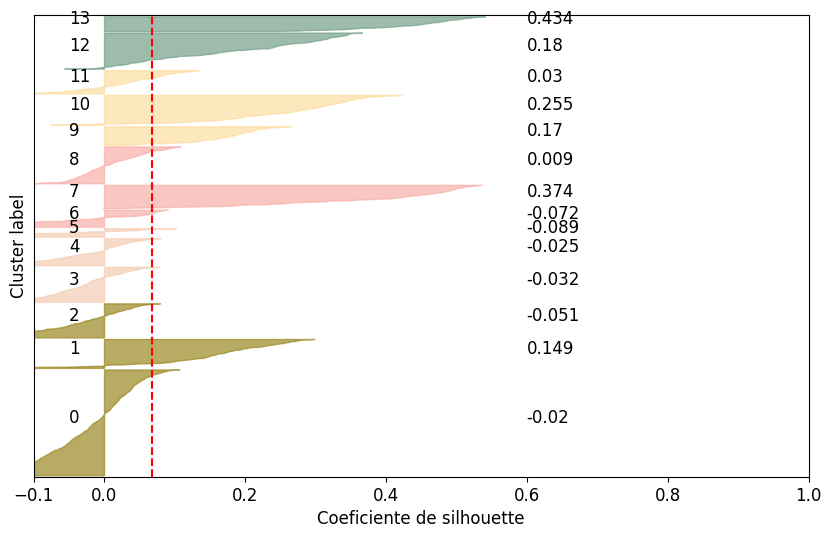

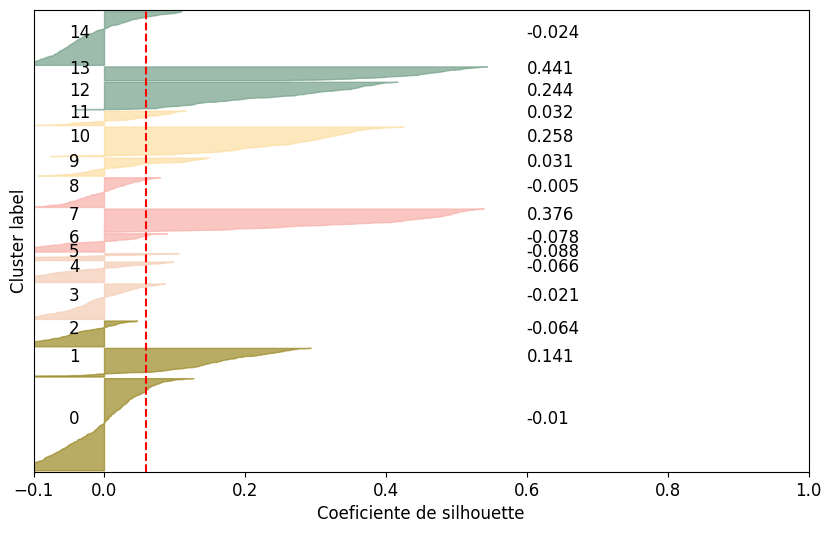

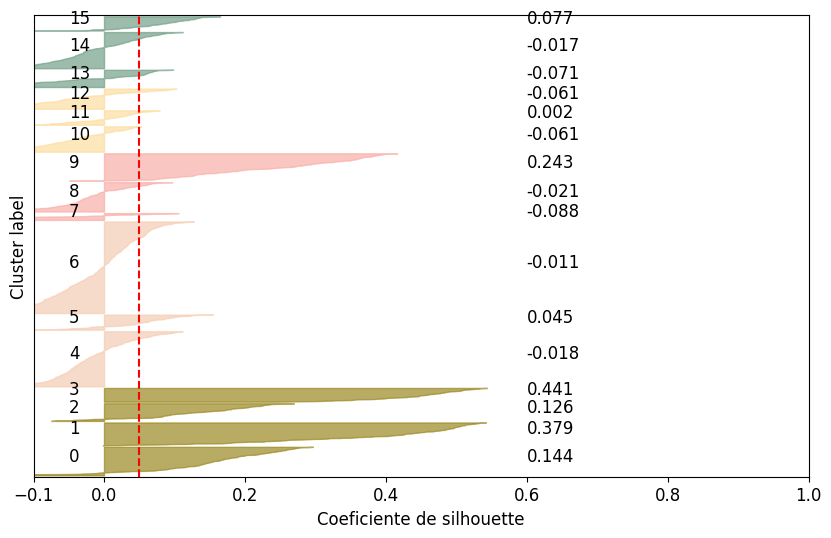

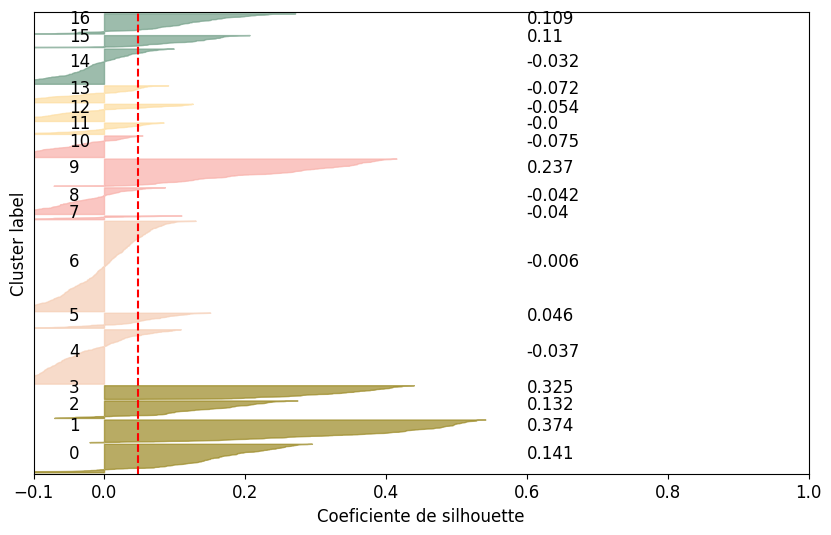

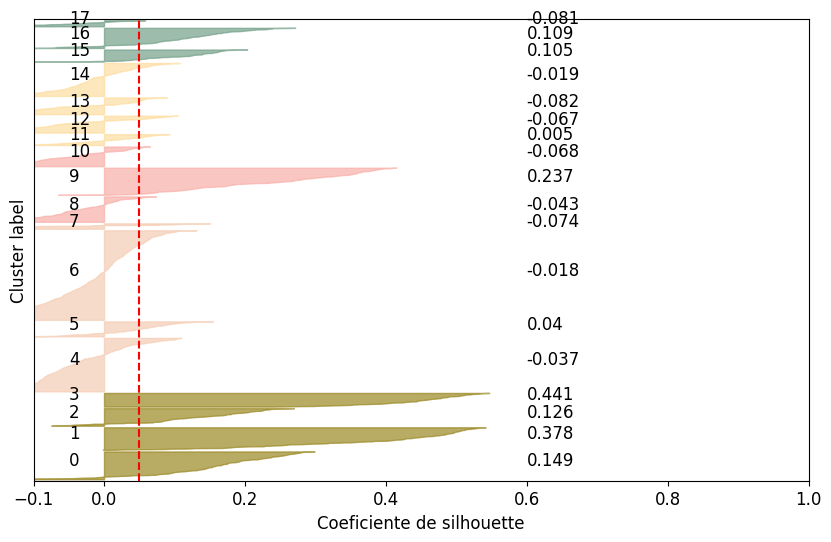

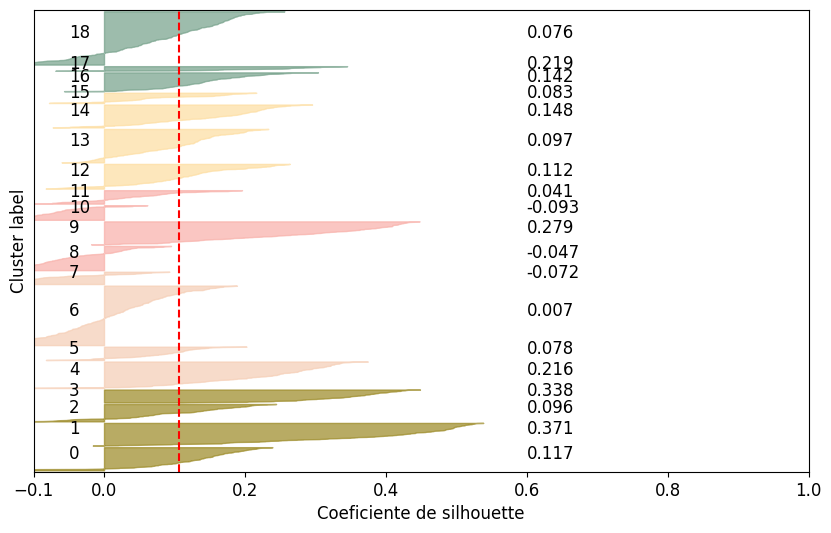

In [ ]:
# Gráfico de Silhouette
GrafSil2(20,x)

#### Validación externa

##### **Matríz de confusión**

In [ ]:
ctKmedoids = pd.crosstab(clase,kmedoids_labels)

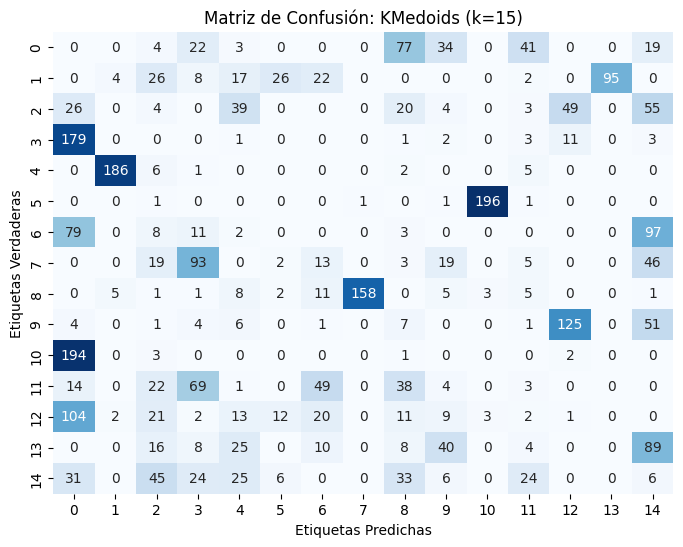

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(ctKmedoids, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=range(15), yticklabels=range(15))
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.title("Matriz de Confusión: KMedoids (k=15)")
plt.show()

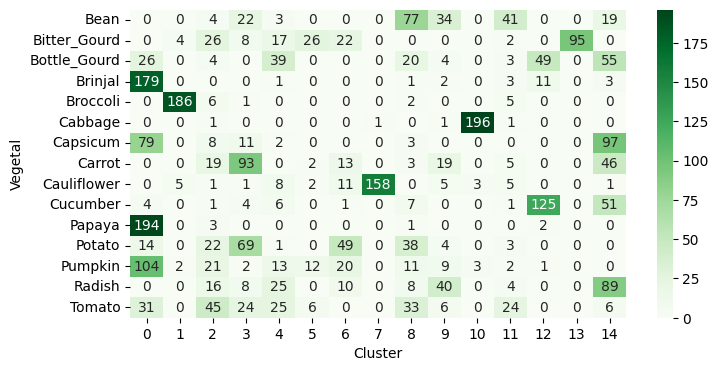

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,4))
sns.heatmap(ctKmedoids,cmap='Greens',annot=True,fmt='g')
plt.xlabel("Cluster")
plt.ylabel("Vegetal")
plt.savefig(image_path+"/../../kmedoids_confusion_matrix.png")
plt.show()

Broccoli y Cabbage son los mejores clasificados, en cambio Brinjal, papaya y Pumpkin están casi todos en el mismo cluster.

##### **Índice de Van Dongen**

In [ ]:
print(f"Van Dongen para K-medoids: {vanDongen(ctKmedoids)}")

Van Dongen para K-medoids: 0.5372412458889534


##### **Índice Rand Ajustado**

In [ ]:
adjusted_rand_score (clase,kmedoids_labels)

0.3248447819642691

## VII. CLUSTERING BASADO EN DENSIDAD

RangeIndex(start=0, stop=100, step=1)


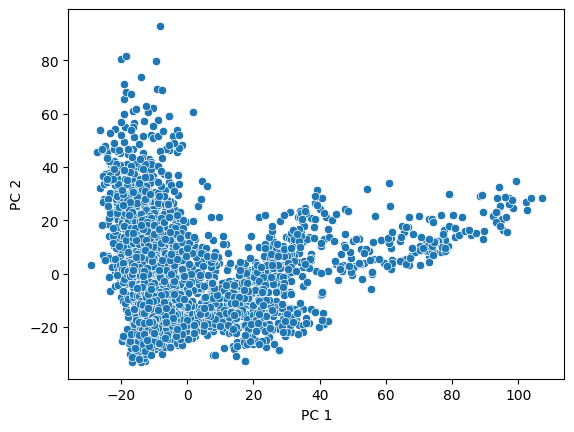

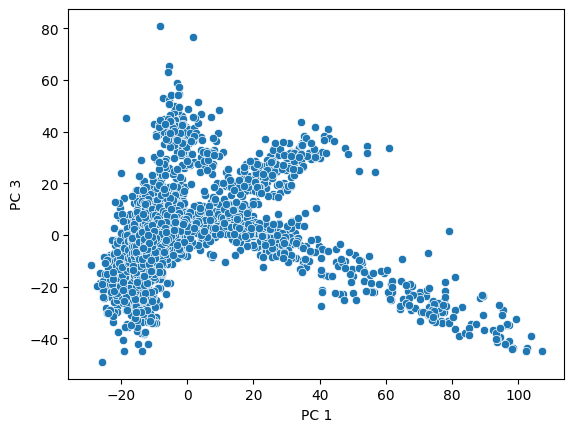

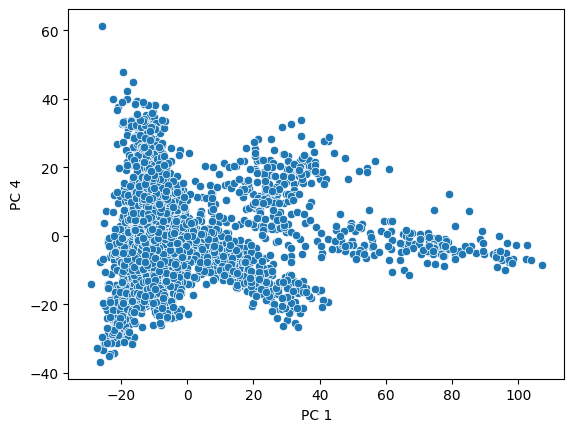

In [ ]:
import seaborn as sns
data=pd.DataFrame(x)
print(data.columns)
palette=sns.color_palette()
sns.set_palette(sns.color_palette())
sns.scatterplot(x=0,y=1,data=data)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()
sns.scatterplot(x=0,y=2,data=data)
plt.xlabel("PC 1")
plt.ylabel("PC 3")
plt.show()
sns.scatterplot(x=0,y=3,data=data)
plt.xlabel("PC 1")
plt.ylabel("PC 4")
plt.show()

In [ ]:
import sklearn
import matplotlib.pyplot as plt
clase = df['label']

for j in range(5,150,5):
  for n,epsilons in enumerate(range(10,100,2)):
    DBscan=sklearn.cluster.DBSCAN(eps=epsilons,
                                  min_samples=j,
                                  metric='euclidean',
                                  metric_params=None,
                                  algorithm='auto',
                                  leaf_size=10,
                                  p=None,
                                  n_jobs=None)
    DBscan.fit(x)
    ctDBscan = pd.crosstab(clase,DBscan.labels_)
    vd=vanDongen(ctDBscan)
    if 20>len(set((DBscan.labels_))) and 0.65>vd:
      print(f"{vd:2f} para eps= {epsilons} y nmin {j} usando {len(set((DBscan.labels_)))} clusters")




0.565176 para eps= 34 y nmin 20 usando 17 clusters
0.605811 para eps= 36 y nmin 20 usando 17 clusters
0.600824 para eps= 34 y nmin 25 usando 15 clusters
0.624942 para eps= 36 y nmin 25 usando 12 clusters
0.642395 para eps= 36 y nmin 30 usando 11 clusters
0.634320 para eps= 38 y nmin 30 usando 12 clusters
0.639624 para eps= 36 y nmin 35 usando 11 clusters
0.639265 para eps= 38 y nmin 40 usando 9 clusters
0.646470 para eps= 40 y nmin 55 usando 7 clusters


Index([       0,        1,        2,        3,        4,        5,        6,
              7,        8,        9,
       ...
             91,       92,       93,       94,       95,       96,       97,
             98,       99, 'labels'],
      dtype='object', length=101)


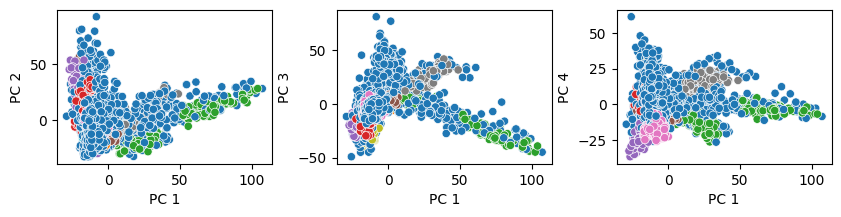

In [26]:
import sklearn
DBscan=sklearn.cluster.DBSCAN(eps=34,
                              min_samples=20,
                              metric='euclidean',
                              metric_params=None,
                              algorithm='auto',
                              leaf_size=100,
                              p=None,
                              n_jobs=None)
DBscan.fit(x)

import seaborn as sns
data=pd.DataFrame(x)
data['labels']=DBscan.labels_
print(data.columns)
palette=sns.color_palette()
sns.set_palette(sns.color_palette())
fig,ax=plt.subplots(1,3,figsize=(10,2),)
fig.subplots_adjust(wspace=0.3)
sns.scatterplot(x=0,y=1,data=data,hue="labels",palette=palette,ax=ax[0])
ax[0].set_xlabel("PC 1")
ax[0].set_ylabel("PC 2")
ax[0].get_legend().remove()
sns.scatterplot(x=0,y=2,data=data,hue="labels",palette=palette,ax=ax[1])
ax[1].set_xlabel("PC 1")
ax[1].set_ylabel("PC 3")
ax[1].get_legend().remove()
sns.scatterplot(x=0,y=3,data=data,hue="labels",palette=palette,ax=ax[2])
ax[2].set_xlabel("PC 1")
ax[2].set_ylabel("PC 4")
ax[2].get_legend().remove()


#### Validación externa

##### **Matríz de confusión**

In [ ]:
clase = df['label'] # la clase

In [ ]:
ctDBscan = pd.crosstab(clase,DBscan.labels_)

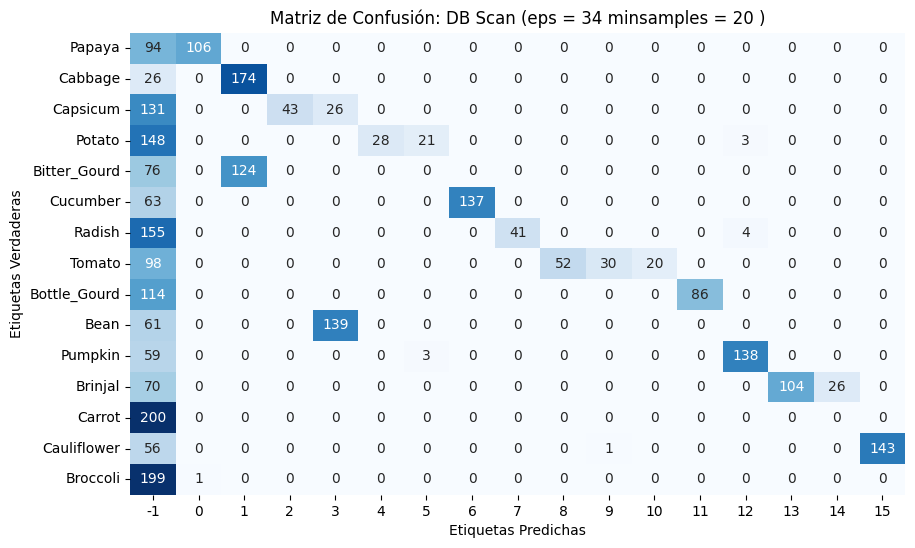

In [ ]:
import seaborn as sns
labels_matrix=['Papaya', 'Cabbage', 'Capsicum', 'Potato',
 'Bitter_Gourd', 'Cucumber', 'Radish', 'Tomato', 'Bottle_Gourd', 'Bean', 'Pumpkin',
 'Brinjal',  'Carrot', 'Cauliflower', 'Broccoli']
plt.figure(figsize=(10, 6))
sns.heatmap(ctDBscan, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=range(-1,16), yticklabels=labels_matrix
            )
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.title("Matriz de Confusión: DB Scan (eps = 34 minsamples = 20 )")
plt.show()

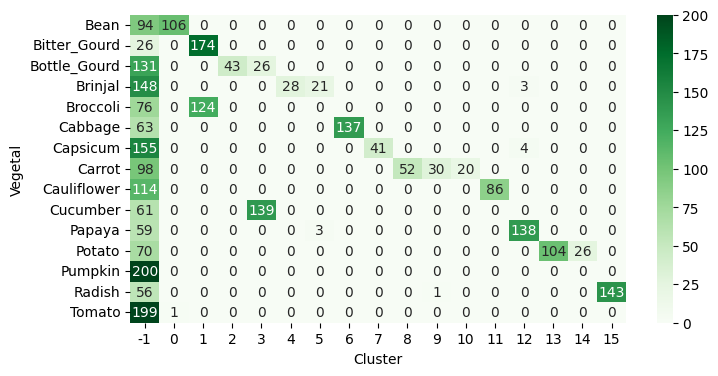

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,4))
sns.heatmap(ctDBscan,cmap='Greens',annot=True,fmt='g')
plt.xlabel("Cluster")
plt.ylabel("Vegetal")
plt.savefig(image_path+"/../../DBscan_confusion_matrix.png")
plt.show()

##### **Índice de Van Dongen**

In [ ]:
print(f"Van Dongen para DB Scan: {vanDongen(ctDBscan)}")

Van Dongen para DB Scan: 0.5651764705882353


##### **Índice Rand Ajustado**

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score (clase,DBscan.labels_)

0.12990657971516287

#Detección de objetos dentro de una imagen

In [ ]:
!pip install pyamg
import pyamg

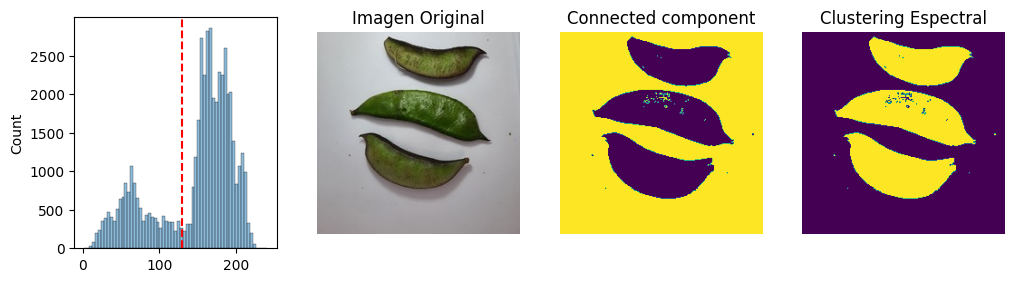

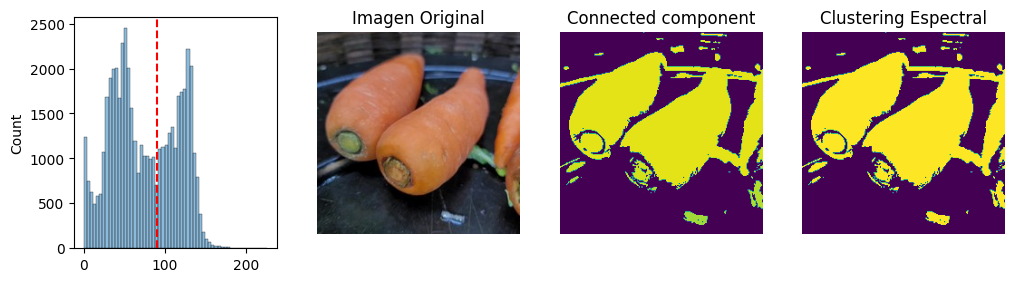

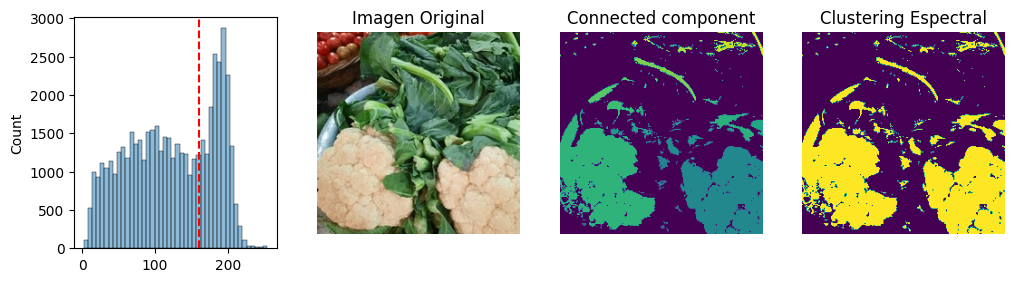

In [7]:
import cv2
import numpy as np
from sklearn.cluster import SpectralClustering
from skimage.measure import label, regionprops
import seaborn as sns


images_for_detection=['0007','1433','1658']
thresholds=[130,90,160]
for i,th in zip(range(len(images_for_detection)),thresholds):
  fig,ax=plt.subplots(1,4,figsize=(12,3))
  # Cargar la imagen
  img = cv2_read_RGB(image_path+f'/{images_for_detection[i]}.jpg')

  # Convertir la imagen a escala de grises (si es necesario)
  gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Thresholding (si es necesario)
  # Esto puede ayudar a convertir la imagen en blanco y negro, resaltando las regiones de interés
  _, binary_img = cv2.threshold(gray_img, th, 255, cv2.THRESH_BINARY)

  # Aplicar Connected-Component Labeling
  labeled_img, num_labels = label(binary_img, connectivity=2, return_num=True)

  # Obtener las propiedades de las regiones etiquetadas
  regions = regionprops(labeled_img)

  # Aplicar Clustering Espectral
  # Supongamos que tienes una lista de píxeles que quieres usar para clustering
  # En este caso, simplemente usaremos los valores de intensidad de los píxeles de la imagen

  pixels = binary_img.flatten().reshape(-1, 1)
  clustering = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=22).fit(pixels)

  #clustering = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=22).fit(pixels)

  # Las etiquetas de los clústeres están en clustering.labels_

  # Ahora puedes hacer lo que necesites con las etiquetas y regiones obtenidas
  # Por ejemplo, visualizar las regiones etiquetadas o utilizar las etiquetas de clustering para algún propósito

  # Visualizar la imagen original y las regiones etiquetadas
  #sns.histplot(pixels,ax=ax[0])
  sns.histplot(gray_img.flatten().reshape(-1,1),ax=ax[0])
  ax[0].legend_ = None
  ax[0].axvline(x=th, ymin=0, ymax=3000,ls='--',c='r')
  ax[1].imshow( img)
  ax[1].axis('off')
  ax[1].set_title('Imagen Original')
  ax[2].imshow( labeled_img.astype(np.uint8) * 255)
  ax[2].set_title('Connected component')
  ax[2].axis('off')
  ax[3].imshow( clustering.labels_.reshape(224,224))
  ax[3].set_title('Clustering Espectral')
  ax[3].axis('off')
  plt.show()

<Axes: ylabel='Count'>

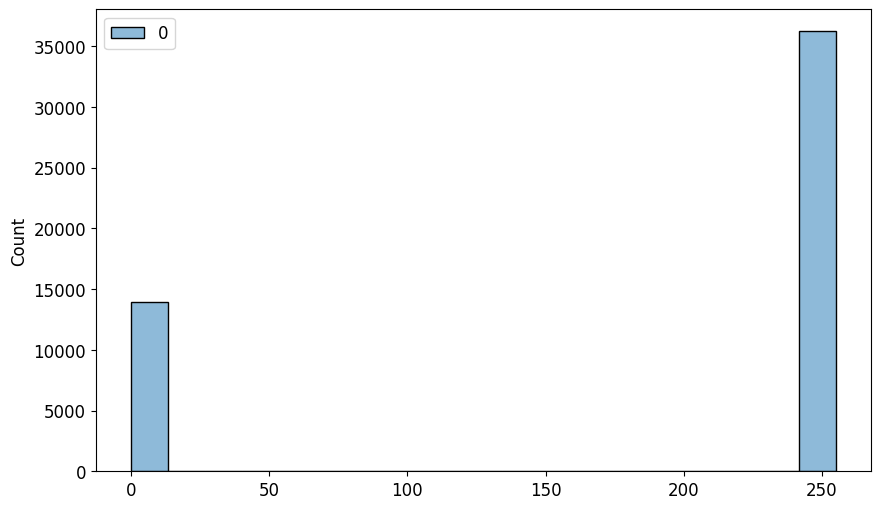

In [43]:
 sns.histplot(pixels)

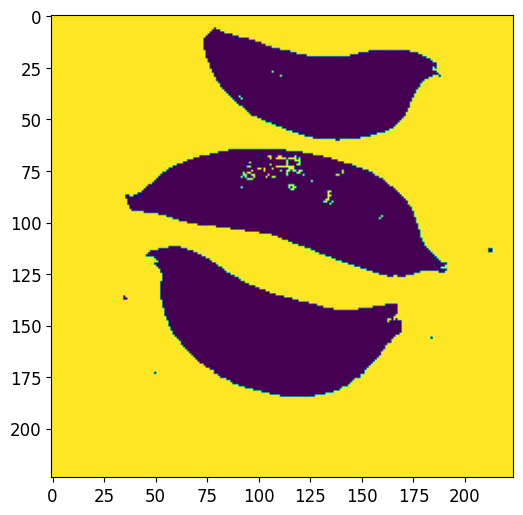

In [35]:
plt.imshow(binary_img)
pixels=binary_img.flatten().reshape(-1,1)

In [36]:
pixels.flatten()

array([255, 255, 255, ..., 255, 255, 255], dtype=uint8)

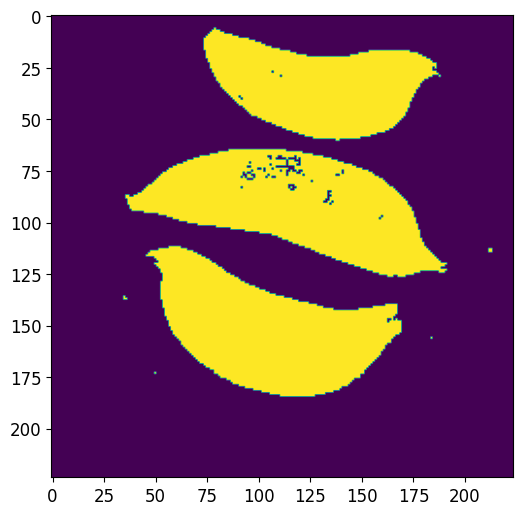

In [37]:
clustering = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=22).fit(pixels)
plt.imshow(clustering.labels_.reshape(224,224))

In [ ]:
clustering = SpectralClustering(n_clusters=10, affinity='nearest_neighbors', random_state=22).fit_predict(pixels)

In [ ]:
plt.imshow(clustering.reshape(224,224))